### EDA

In [52]:
# ==========================================
# 1️⃣ Importación de librerías y carga del CSV
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Cargar el archivo CSV (ajusta el path si es necesario)
df = pd.read_csv("../data/santander_data.csv")

# Mostrar las primeras filas
df.head()

,Price,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,2.625065803527832,9.849401473999023,0.0,9.98788070678711,9.736886024475098,9.953261375427246,0.0,8797337
3,2000-01-04,2.56278395652771,9.615715980529785,0.0,9.780160903930664,9.529166221618652,9.728231430053711,0.0,8811013
4,2000-01-05,2.500502824783325,9.382031440734863,0.0,9.555130958557129,9.304136276245117,9.433960914611816,0.0,9333517


In [53]:
# ==========================================
# 2️⃣ Información básica del dataset
# ==========================================
df.info()

# Verificar columnas y tipos de datos
print("\nColumnas del dataset:")
print(df.columns.tolist())

# Descripción estadística general
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         6637 non-null   object
 1   Adj Close     6636 non-null   object
 2   Close         6636 non-null   object
 3   Dividends     6636 non-null   object
 4   High          6636 non-null   object
 5   Low           6636 non-null   object
 6   Open          6636 non-null   object
 7   Stock Splits  6636 non-null   object
 8   Volume        6636 non-null   object
dtypes: object(9)
memory usage: 466.8+ KB

Columnas del dataset:
['Price', 'Adj Close', 'Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume']


,count,unique,top,freq
Price,6637,6637,Ticker,1
Adj Close,6636,5896,2.1013591289520264,7
Close,6636,4493,8.222258567810059,16
Dividends,6636,59,0.0,6541
High,6636,4422,9.433960914611816,12
Low,6636,4462,9.546476364135742,17
Open,6636,4258,9.546476364135742,16
Stock Splits,6636,4,0.0,6633
Volume,6636,6557,0,79


In [54]:
# ==========================================
# Leer CSV con MultiIndex de columnas
# ==========================================
import pandas as pd

# Ajusta la ruta si hace falta
path = "../data/santander_data.csv"

# Lee usando dos filas de cabecera (header=[0,1]),
# usa la primera columna como índice (Date) y parsea fechas
df = pd.read_csv(path, header=[0,1], index_col=0, parse_dates=[0])

# Aplanar columnas: nos quedamos solo con el nivel superior ('Open','High',...)
df.columns = df.columns.get_level_values(0)


df = df.drop(columns=['Stock Splits'])

# Convertir a columna Date (en lugar de índice) si la quieres así
df = df.reset_index().rename(columns={'index': 'Date'})

# Asegurar tipos numéricos
num_cols = [c for c in df.columns if c not in ['Date']]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


df.columns.name = None

df.head()

,Date,Adj Close,Close,Dividends,High,Low,Open,Volume
0,2000-01-03,2.63,9.85,0.00,9.99,9.74,9.95,8797337
1,2000-01-04,2.56,9.62,0.00,9.78,9.53,9.73,8811013
2,2000-01-05,2.50,9.38,0.00,9.56,9.30,9.43,9333517
3,2000-01-06,2.50,9.38,0.00,9.38,9.38,9.38,0
4,2000-01-07,2.61,9.80,0.00,9.82,9.44,9.45,9603132


In [55]:
# Convertir la columna Date a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar por fecha (por si no lo está)
df.sort_values('Date', inplace=True)

# Resetear índice
df.reset_index(drop=True, inplace=True)

In [56]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
Dividends    0
High         0
Low          0
Open         0
Volume       0
dtype: int64

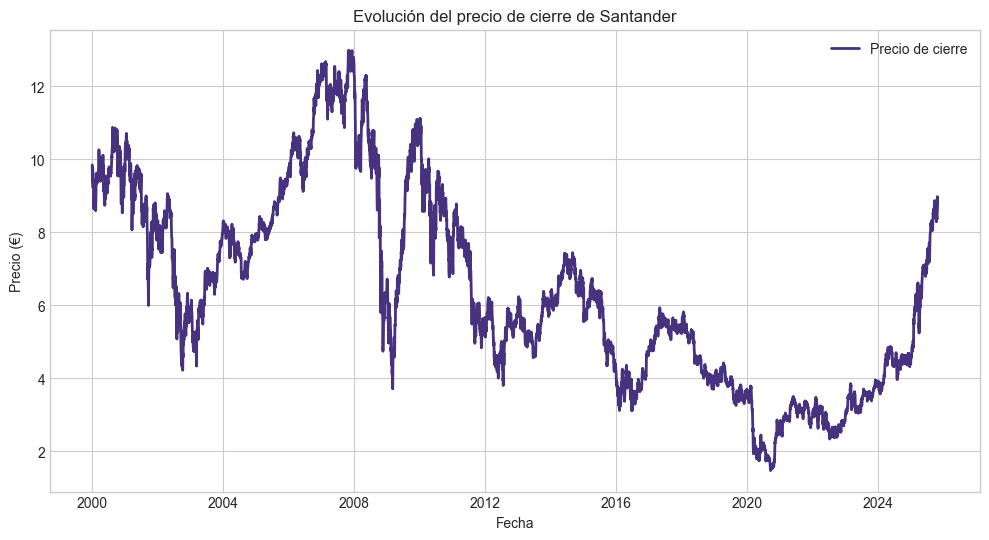

In [57]:
# ==========================================
# 4️⃣ Evolución temporal del precio de cierre
# ==========================================
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', linewidth=2)
plt.title("Evolución del precio de cierre de Santander")
plt.xlabel("Fecha")
plt.ylabel("Precio (€)")
plt.legend()
plt.show()

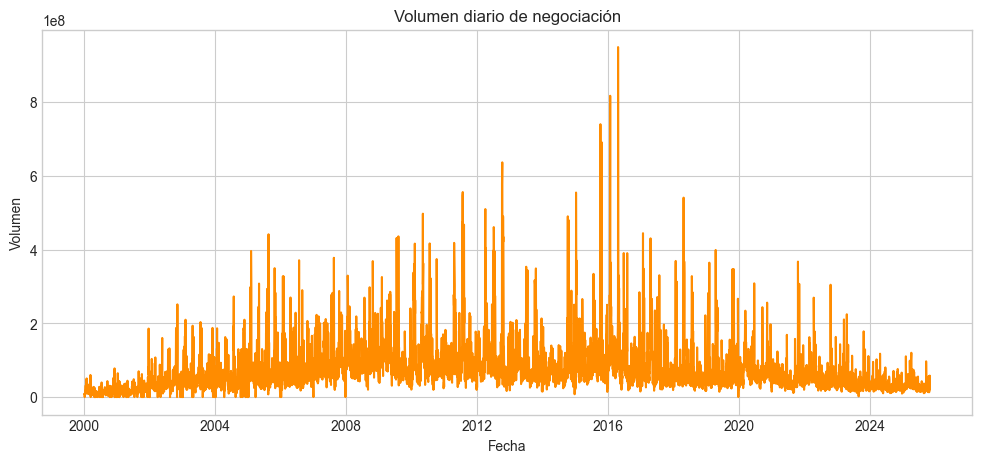

In [58]:
# ==========================================
# 5️⃣ Volumen de negociación
# ==========================================
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'], color='darkorange')
plt.title("Volumen diario de negociación")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.show()

In [59]:
# ==========================================
# 7️⃣ Variables derivadas: retornos, medias móviles, volatilidad
# ==========================================

# Retorno diario
df['Return'] = df['Close'].pct_change()

# Medias móviles
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Volatilidad (desviación estándar móvil)
df['Volatility_30'] = df['Return'].rolling(window=30).std()

# Rango diario: diferencia entre el máximo y el mínimo del día
df['Range'] = df['High'] - df['Low']

# Cuerpo de la vela: diferencia entre el precio de apertura y cierre (en valor absoluto)
df['Body'] = abs(df['Close'] - df['Open'])


# Lista de eventos históricos importantes

eventos_historicos = [
    {'fecha': '2001-09-11', 'evento': 'Atentados 11S', 'impacto': 1},
    {'fecha': '2008-09-15', 'evento': 'Crisis financiera global', 'impacto': 1},
    {'fecha': '2010-05-01', 'evento': 'Crisis de deuda en la Eurozona', 'impacto': 1},
    {'fecha': '2012-07-26', 'evento': 'Draghi: "Whatever it takes"', 'impacto': 0},
    {'fecha': '2016-06-23', 'evento': 'Brexit', 'impacto': 1},
    {'fecha': '2020-03-01', 'evento': 'Inicio pandemia COVID-19', 'impacto': 1},
    {'fecha': '2022-02-24', 'evento': 'Guerra en Ucrania', 'impacto': 1},
    {'fecha': '2022-07-01', 'evento': 'Subida de tipos BCE', 'impacto': 0},
    {'fecha': '2004-07-23', 'evento': 'Adquisición Abbey National (UK)', 'impacto': 0},
    {'fecha': '2014-09-10', 'evento': 'Fallecimiento de Emilio Botín', 'impacto': 1},
    {'fecha': '2014-09-11', 'evento': 'Nombramiento de Ana Botín', 'impacto': 0},
    {'fecha': '2017-06-07', 'evento': 'Compra de Banco Popular', 'impacto': 1}
    ]

# Convertimos la lista a DataFrame
df_eventos = pd.DataFrame(eventos_historicos)

# Convertimos las fechas a formato datetime
df_eventos['fecha'] = pd.to_datetime(df_eventos['fecha'])

# Creamos una nueva columna con valor 0 (por defecto = sin evento negativo)
df['evento_negativo'] = 0

# Recorremos la lista de eventos
for evento in eventos_historicos:
    fecha_evento = pd.Timestamp(evento['fecha'])
    impacto = evento['impacto']

    # Creamos una ventana de ±15 días alrededor del evento
    mask = (df['Date'] >= fecha_evento - pd.Timedelta(days=15)) & \
           (df['Date'] <= fecha_evento + pd.Timedelta(days=15))

    # Marcamos con el valor del impacto (1 o 0)
    df.loc[mask, 'evento_negativo'] = impacto


# Mostrar últimas filas con nuevas variables
df.tail(10)

,Date,Adj Close,Close,Dividends,High,Low,Open,Volume,Return,MA_7,MA_30,Volatility_30,Range,Body,evento_negativo
6625,2025-10-20,8.33,8.44,0.00,8.51,8.37,8.45,40503665,0.02,8.49,8.60,0.01,0.14,0.01,0
6626,2025-10-21,8.26,8.36,0.00,8.50,8.36,8.48,46461909,-0.01,8.47,8.60,0.01,0.14,0.11,0
6627,2025-10-22,8.28,8.39,0.00,8.47,8.34,8.36,29811260,0.00,8.44,8.60,0.01,0.13,0.02,0
6628,2025-10-23,8.29,8.39,0.00,8.47,8.36,8.41,13233829,0.00,8.42,8.59,0.01,0.11,0.02,0
6629,2025-10-24,8.26,8.37,0.00,8.47,8.31,8.43,17105426,-0.00,8.40,8.59,0.01,0.16,0.06,0
6630,2025-10-27,8.40,8.51,0.00,8.55,8.41,8.42,27482152,0.02,8.39,8.59,0.01,0.14,0.09,0
6631,2025-10-28,8.50,8.61,0.00,8.64,8.48,8.50,31031001,0.01,8.44,8.59,0.01,0.16,0.11,0
6632,2025-10-29,8.86,8.98,0.00,8.99,8.55,8.61,58187805,0.04,8.52,8.61,0.02,0.44,0.37,0
6633,2025-10-30,8.75,8.75,0.12,8.96,8.60,8.96,31127250,-0.03,8.57,8.62,0.02,0.35,0.21,0
6634,2025-10-31,8.83,8.83,0.00,8.85,8.72,8.79,20602993,0.01,8.63,8.62,0.02,0.13,0.03,0


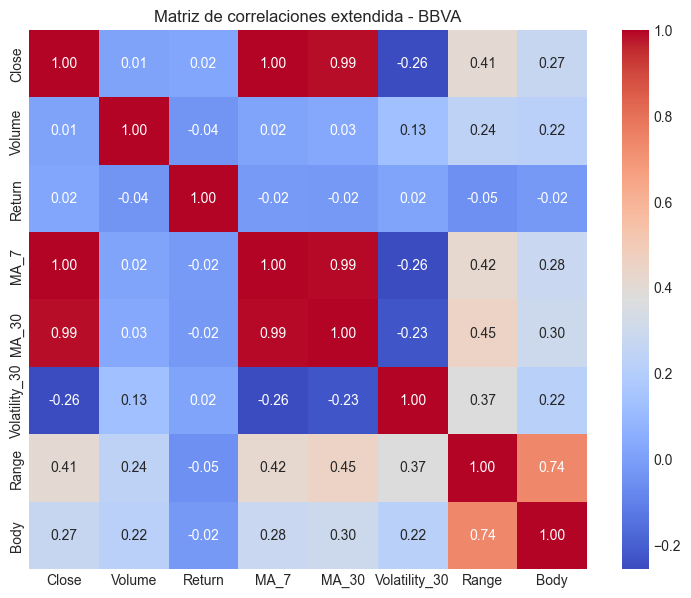


📊 Correlaciones con el precio de cierre (close):
Close            1.00
MA_7             1.00
MA_30            0.99
Range            0.41
Body             0.27
Return           0.02
Volume           0.01
Volatility_30   -0.26
Name: Close, dtype: float64


In [60]:
cols_corr = [
    'Close', 'Volume', 'Return', 'MA_7', 'MA_30',
    'Volatility_30', 'Range', 'Body'
]

# Calculamos la matriz de correlación
corr = df[cols_corr].corr()

# Y la visualizamos con un mapa de calor
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones extendida - BBVA")
plt.show()

print("\n📊 Correlaciones con el precio de cierre (close):")
print(corr["Close"].sort_values(ascending=False))

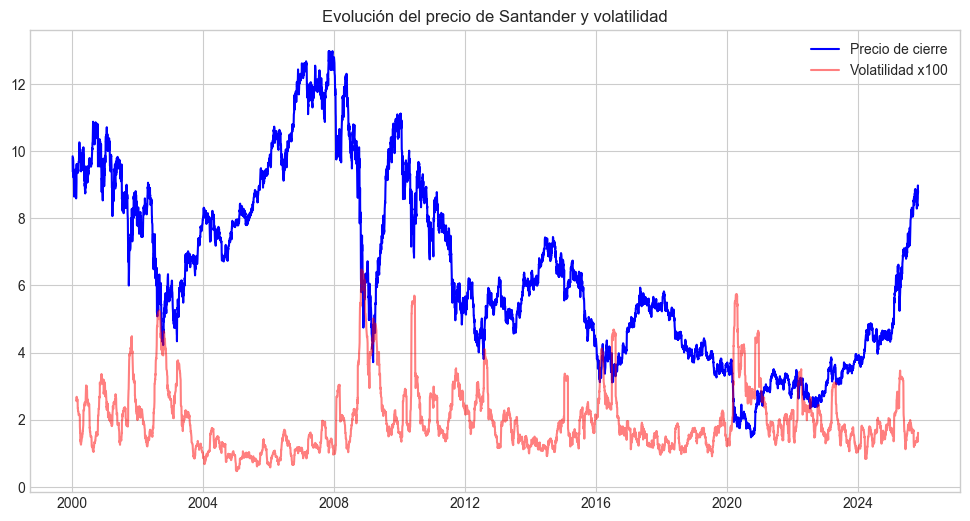

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='blue')
plt.plot(df['Date'], df['Volatility_30']*100, label='Volatilidad x100', color='red', alpha=0.5)
plt.legend()
plt.title('Evolución del precio de Santander y volatilidad')
plt.show()

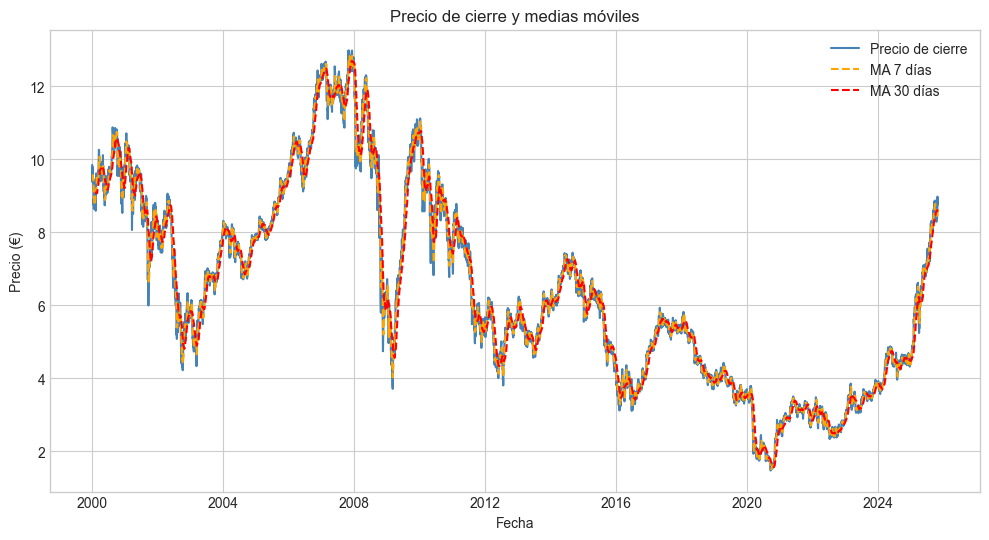

In [62]:
# ==========================================
# 8️⃣ Visualización de medias móviles
# ==========================================
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Precio de cierre', color='steelblue')
plt.plot(df['Date'], df['MA_7'], label='MA 7 días', linestyle='--', color='orange')
plt.plot(df['Date'], df['MA_30'], label='MA 30 días', linestyle='--', color='red')
plt.title("Precio de cierre y medias móviles")
plt.xlabel("Fecha")
plt.ylabel("Precio (€)")
plt.legend()
plt.show()

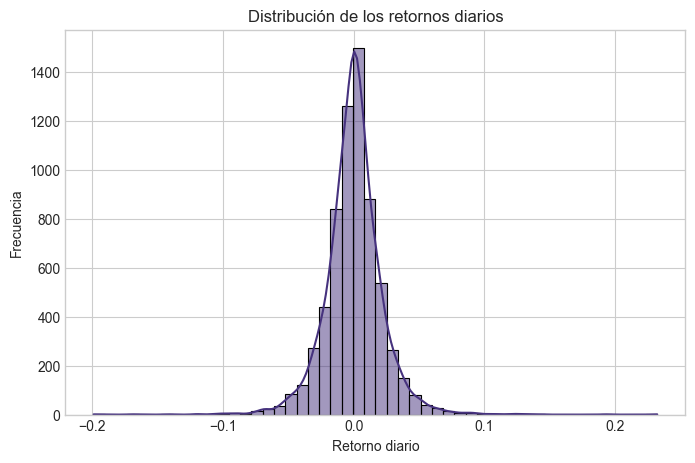

In [63]:
# ==========================================
# 9️⃣ Distribución de retornos
# ==========================================
plt.figure(figsize=(8,5))
sns.histplot(df['Return'].dropna(), bins=50, kde=True)
plt.title("Distribución de los retornos diarios")
plt.xlabel("Retorno diario")
plt.ylabel("Frecuencia")
plt.show()

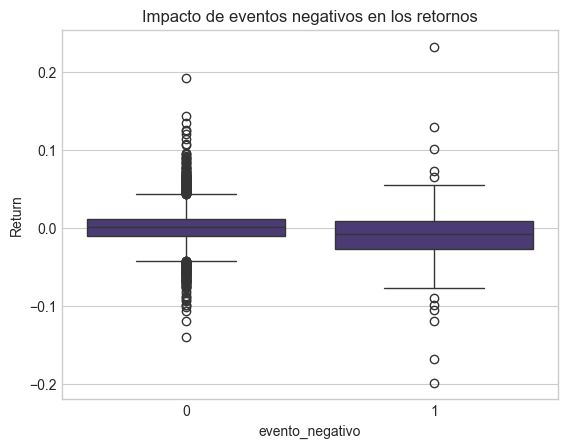

In [64]:
sns.boxplot(x='evento_negativo', y='Return', data=df)
plt.title('Impacto de eventos negativos en los retornos')
plt.show()

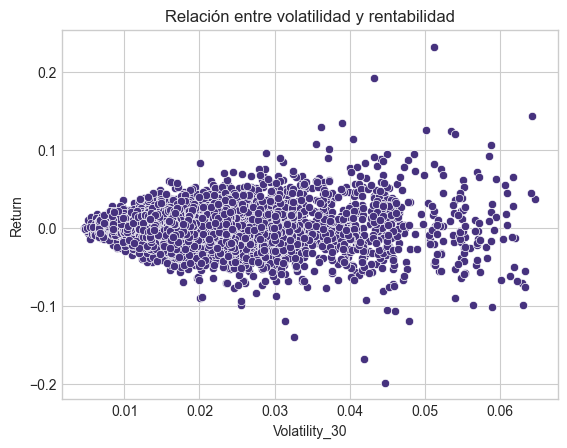

In [65]:
sns.scatterplot(x='Volatility_30', y='Return', data=df)
plt.title('Relación entre volatilidad y rentabilidad')
plt.show()

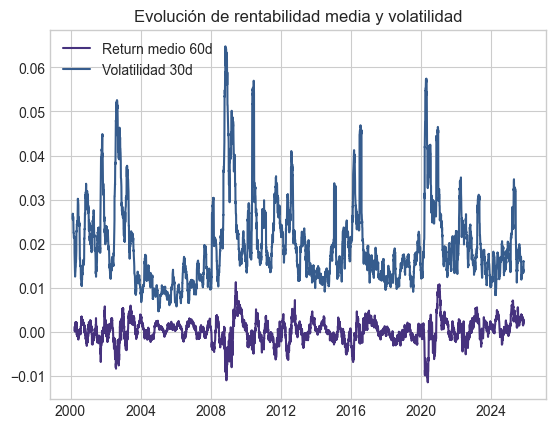

In [66]:
plt.plot(df['Date'], df['Return'].rolling(60).mean(), label='Return medio 60d')
plt.plot(df['Date'], df['Volatility_30'], label='Volatilidad 30d')
plt.legend()
plt.title('Evolución de rentabilidad media y volatilidad')
plt.show()

In [67]:
# Crear columna binaria (1 = hay dividendo, 0 = no hay)
df["Dividens_bin"] = np.where(df["Dividends"] > 0, 1, 0)

# Verificar los primeros valores
print(df[["Date", "Dividens_bin", "Dividends"]].head(40))
#eliminar columna dividends
df = df.drop(columns=["Dividends"])

         Date  Dividens_bin  Dividends
0  2000-01-03             0       0.00
1  2000-01-04             0       0.00
2  2000-01-05             0       0.00
3  2000-01-06             0       0.00
4  2000-01-07             0       0.00
5  2000-01-10             0       0.00
6  2000-01-11             0       0.00
7  2000-01-12             0       0.00
8  2000-01-13             0       0.00
9  2000-01-14             0       0.00
10 2000-01-17             0       0.00
11 2000-01-18             0       0.00
12 2000-01-19             0       0.00
13 2000-01-20             0       0.00
14 2000-01-21             0       0.00
15 2000-01-24             0       0.00
16 2000-01-25             0       0.00
17 2000-01-26             0       0.00
18 2000-01-27             0       0.00
19 2000-01-28             0       0.00
20 2000-01-31             1       0.05
21 2000-02-01             0       0.00
22 2000-02-02             0       0.00
23 2000-02-03             0       0.00
24 2000-02-04            

In [68]:
df = df.drop(columns=["Adj Close"])

In [69]:
df_actualizado = df.copy()

In [70]:
df_actualizado = df_actualizado.dropna().reset_index(drop=True)

print("✅ Nulos eliminados correctamente.")
print(df_actualizado.isna().sum())

✅ Nulos eliminados correctamente.
Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
Return             0
MA_7               0
MA_30              0
Volatility_30      0
Range              0
Body               0
evento_negativo    0
Dividens_bin       0
dtype: int64


In [71]:
df_actualizado.to_csv("../data/santander_data_actualizado.csv", index=False)

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# =========================
# 0) Preparación
# =========================
df_raw = df_actualizado.copy()  # tu DF limpio y sin NaN
df_raw = df_raw.sort_values('Date').reset_index(drop=True)

# Features que tienes (ajusta si falta alguna)
feature_cols = [
    'Open','High','Low','Volume',
    'Range','Return',              # ya las tienes
    'MA_7','MA_30','Volatility_30',# medias/volatilidad
    'Body',                        # cuerpo vela
    'evento_negativo'              # binaria → NO escalar
]

# Target
target_col = 'Close'              # o 'Return' si prefieres predecir dirección
lookback = 60

# =========================
# 1) Split temporal (train/valid)
# =========================
# Ejemplo simple: 80% train, 20% valid manteniendo orden temporal
split_idx = int(len(df_raw)*0.8)
df_train = df_raw.iloc[:split_idx].copy()
df_valid = df_raw.iloc[split_idx:].copy()

# =========================
# 2) Escalado (fit SOLO en train)
# =========================
cont_cols = [c for c in feature_cols if c not in ['evento_negativo', 'Return']]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()  # para el target si es 'Close'

# Ajustar con train
df_train_scaled = df_train.copy()
df_train_scaled[cont_cols] = scaler_X.fit_transform(df_train[cont_cols])

# Transformar valid
df_valid_scaled = df_valid.copy()
df_valid_scaled[cont_cols] = scaler_X.transform(df_valid[cont_cols])

# Escalar target si predices Close (recomendado para NN)
if target_col == 'Close':
    df_train_scaled[[target_col]] = scaler_y.fit_transform(df_train[[target_col]])
    df_valid_scaled[[target_col]] = scaler_y.transform(df_valid[[target_col]])
else:
    # si target es 'Return', normalmente NO lo escalo
    pass

# =========================
# 3) Crear secuencias
# =========================
def create_sequences(mat_X, vec_y, lb):
    Xs, ys = [], []
    for i in range(len(mat_X)-lb):
        Xs.append(mat_X[i:i+lb])
        ys.append(vec_y[i+lb])
    return np.array(Xs), np.array(ys)

# Matrices de entrada/salida
X_train_all = df_train_scaled[feature_cols].astype(float).values
y_train_all = df_train_scaled[target_col].astype(float).values
X_valid_all = df_valid_scaled[feature_cols].astype(float).values
y_valid_all = df_valid_scaled[target_col].astype(float).values

X_train_seq, y_train_seq = create_sequences(X_train_all, y_train_all, lookback)
X_valid_seq, y_valid_seq = create_sequences(X_valid_all, y_valid_all, lookback)

print("Train seq:", X_train_seq.shape, y_train_seq.shape)
print("Valid seq:", X_valid_seq.shape, y_valid_seq.shape)

# =========================
# 4) DataLoaders
# =========================
batch_size = 64
train_ds = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32),
                         torch.tensor(y_train_seq, dtype=torch.float32).view(-1,1))
valid_ds = TensorDataset(torch.tensor(X_valid_seq, dtype=torch.float32),
                         torch.tensor(y_valid_seq, dtype=torch.float32).view(-1,1))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=False)

print(f"✅ Loaders OK — Train batches: {len(train_loader)}, Valid batches: {len(valid_loader)}")

Train seq: (5224, 60, 11) (5224,)
Valid seq: (1261, 60, 11) (1261,)
✅ Loaders OK — Train batches: 82, Valid batches: 20


In [73]:
df_train_scaled.head()

,Date,Close,High,Low,Open,Volume,Return,MA_7,MA_30,Volatility_30,Range,Body,evento_negativo,Dividens_bin
0,2000-02-14,0.65,0.67,0.62,0.64,0.03,0.05,0.66,0.67,0.35,0.53,0.07,0,0
1,2000-02-15,0.66,0.67,0.66,0.66,0.02,0.02,0.66,0.67,0.35,0.28,0.02,0,0
2,2000-02-16,0.70,0.69,0.67,0.68,0.04,0.05,0.67,0.67,0.37,0.29,0.22,0,0
3,2000-02-17,0.70,0.70,0.70,0.69,0.02,-0.00,0.67,0.67,0.37,0.16,0.05,0,0
4,2000-02-18,0.68,0.69,0.68,0.70,0.02,-0.03,0.67,0.67,0.35,0.20,0.22,0,0


### Modelo LSTM

In [74]:
# ==========================================
# Modelo LSTM sencillo para series temporales
# ==========================================
import torch
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.head = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        # x: (batch, seq_len, n_features)
        out, _ = self.lstm(x)          # (batch, seq_len, hidden)
        out = out[:, -1, :]            # último paso temporal
        out = self.head(out)           # (batch, 1)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_features = X_train_seq.shape[-1]

model = LSTMRegressor(n_features=n_features, hidden_size=64, num_layers=2, dropout=0.2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def rmse(y_true, y_pred):
    return torch.sqrt(nn.functional.mse_loss(y_pred, y_true))

In [75]:
def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    total_loss, total_rmse, n = 0.0, 0.0, 0
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            if train:
                optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            if train:
                loss.backward()
                optimizer.step()
            total_loss += loss.item() * len(xb)
            total_rmse += rmse(yb, pred).item() * len(xb)
            n += len(xb)
    return total_loss / n, total_rmse / n

best_val = float('inf')
patience, patience_left = 100, 100
epochs = 1000
history = []

for epoch in range(1, epochs+1):
    train_loss, train_rmse = run_epoch(train_loader, train=True)
    val_loss, val_rmse = run_epoch(valid_loader, train=False)
    history.append((train_rmse, val_rmse))
    print(f"Epoch {epoch:03d} | RMSE train: {train_rmse:.4f} | RMSE val: {val_rmse:.4f}")

    if val_rmse < best_val - 1e-5:
        best_val = val_rmse
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping")
            break

# Restaurar mejor estado
model.load_state_dict(best_state)
model.to(device)

Epoch 001 | RMSE train: 0.1497 | RMSE val: 0.0676
Epoch 002 | RMSE train: 0.0383 | RMSE val: 0.0192
Epoch 003 | RMSE train: 0.0300 | RMSE val: 0.0109
Epoch 004 | RMSE train: 0.0269 | RMSE val: 0.0102
Epoch 005 | RMSE train: 0.0254 | RMSE val: 0.0091
Epoch 006 | RMSE train: 0.0256 | RMSE val: 0.0114
Epoch 007 | RMSE train: 0.0231 | RMSE val: 0.0105
Epoch 008 | RMSE train: 0.0226 | RMSE val: 0.0098
Epoch 009 | RMSE train: 0.0211 | RMSE val: 0.0109
Epoch 010 | RMSE train: 0.0213 | RMSE val: 0.0119
Epoch 011 | RMSE train: 0.0203 | RMSE val: 0.0098
Epoch 012 | RMSE train: 0.0199 | RMSE val: 0.0096
Epoch 013 | RMSE train: 0.0197 | RMSE val: 0.0102
Epoch 014 | RMSE train: 0.0190 | RMSE val: 0.0123
Epoch 015 | RMSE train: 0.0193 | RMSE val: 0.0102
Epoch 016 | RMSE train: 0.0187 | RMSE val: 0.0092
Epoch 017 | RMSE train: 0.0178 | RMSE val: 0.0096
Epoch 018 | RMSE train: 0.0183 | RMSE val: 0.0086
Epoch 019 | RMSE train: 0.0177 | RMSE val: 0.0088
Epoch 020 | RMSE train: 0.0182 | RMSE val: 0.0107


LSTMRegressor(
  (lstm): LSTM(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (head): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [76]:
# ==========================================
# Predicciones en valid y desescalado (a euros)
# ==========================================
model.eval()
val_preds_scaled = []
val_true_scaled  = []

with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        pred = model(xb).cpu().numpy()
        val_preds_scaled.append(pred)
        val_true_scaled.append(yb.numpy())

val_preds_scaled = np.vstack(val_preds_scaled)   # (N, 1)
val_true_scaled  = np.vstack(val_true_scaled)    # (N, 1)

# Invertir el escalado del target SI target_col == 'Close'
# (usa el scaler_y que ya ajustaste con el train)
from numpy import hstack
val_preds = scaler_y.inverse_transform(val_preds_scaled)
val_true  = scaler_y.inverse_transform(val_true_scaled)

print("RMSE valid (€):", np.sqrt(((val_preds - val_true)**2).mean()))

RMSE valid (€): 0.085055895


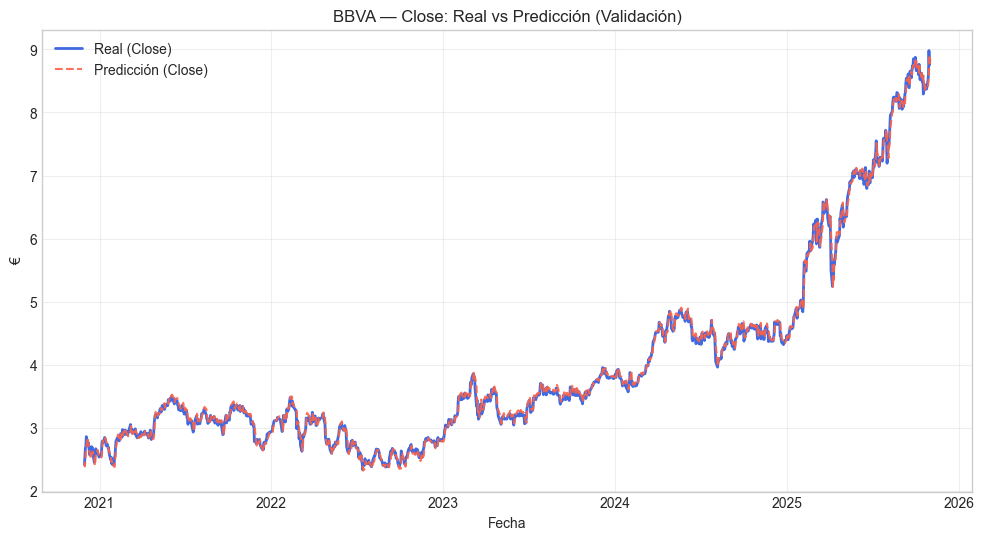

In [77]:
import matplotlib.pyplot as plt

# Alineación temporal: por las ventanas, perdemos 'lookback' pasos al inicio de cada split
valid_dates = df_valid['Date'].iloc[lookback:].reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true.flatten(),
         label='Real (Close)',
         color='royalblue', linewidth=2)

plt.plot(valid_dates, val_preds.flatten(),
         label='Predicción (Close)',
         color='tomato', linestyle='--', alpha=0.9)

plt.title('BBVA — Close: Real vs Predicción (Validación)')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

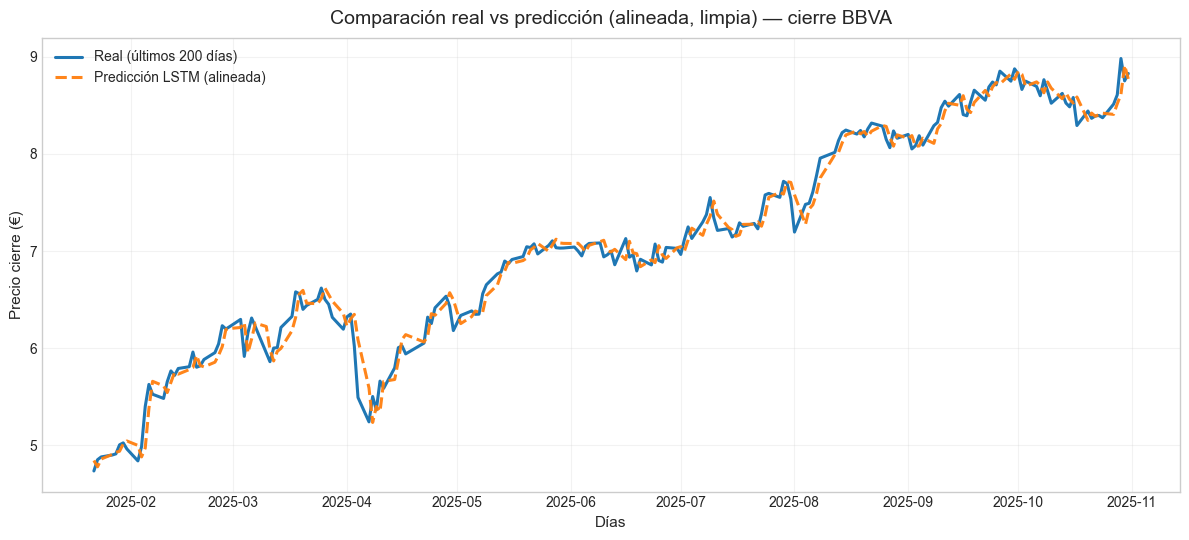

In [78]:
# ==========================================
# 📈 Comparación real vs predicción (LSTM)
# Alineada, limpia y opcionalmente normalizada
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # días finales a mostrar (ej: 100)
smooth_sigma = 0      # 0 = sin suavizado; prueba 2–3 si quieres curvas más suaves
normalize = False     # True = escala ambas series 0–1 en el tramo mostrado

# --- alinear longitudes por seguridad ---
m = min(len(val_true), len(val_preds), len(valid_dates))
y_real_full = val_true.flatten()[:m]
y_pred_full = val_preds.flatten()[:m]
d_full      = np.array(valid_dates)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalizar (opcional, para que se vean “pegadas”) ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"


# --- gráfico estilo “presentación” ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label="Real (últimos {} días)".format(last_k),
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción LSTM (alineada)",
         color="#ff7f0e", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre BBVA", fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11); plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [79]:
import joblib
torch.save(model.state_dict(), "../models/lstm_santander2.pt")
joblib.dump(scaler_X, "../models/scaler_X_santander2.pkl")
joblib.dump(scaler_y, "../models/scaler_y_santander2.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados


In [80]:
# y_true y y_pred del VALID ya desescalados en € (los que has graficado)
y_true = val_true.flatten()
y_pred = val_preds.flatten()

# Baseline 1: Naive (mañana = hoy) usando la propia serie real del valid
# Ojo: por alineación, comparamos desde el segundo valor
y_naive = y_true[:-1]
y_true_naive_cmp = y_true[1:]

def rmse(a,b): return np.sqrt(((a-b)**2).mean())
def mae(a,b):  return np.abs(a-b).mean()
def mape(a,b): return (np.abs((a-b)/a).mean()*100)

print("LSTM  - RMSE/MAE/MAPE:",
      rmse(y_true, y_pred), mae(y_true, y_pred), mape(y_true, y_pred))

print("Naive - RMSE/MAE/MAPE:",
      rmse(y_true_naive_cmp, y_naive),
      mae(y_true_naive_cmp, y_naive),
      mape(y_true_naive_cmp, y_naive))

LSTM  - RMSE/MAE/MAPE: 0.085055895 0.061924133 1.6073323
Naive - RMSE/MAE/MAPE: 0.0806329 0.05775675 1.4734539


### RNN Simple

In [81]:
class SimpleRNNRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.rnn = nn.RNN(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]   # último paso temporal
        return self.fc(out)

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = X_train_seq.shape[2]
hidden_size = 64
num_layers = 2
dropout = 0.2
lr = 0.001
epochs = 1000

# Crear modelo
model_rnn = SimpleRNNRegressor(n_features, hidden_size, num_layers, dropout).to(device)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=lr)

In [83]:
# ============================================================
# 🔁 ENTRENAMIENTO RNN con Early Stopping + ReduceLROnPlateau
# ============================================================
import torch.nn as nn

train_losses, valid_losses = [], []



best_val = float('inf')
best_state = None
patience = 12          # nº de épocas sin mejora antes de parar
patience_left = patience
tol = 1e-6             # umbral mínimo de mejora
max_epochs = epochs    # puedes dejar 1000; parará antes

for epoch in range(1, max_epochs+1):
    # --------- TRAIN ---------
    model_rnn.train()
    batch_losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model_rnn(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_loss = float(np.mean(batch_losses))
    train_losses.append(train_loss)

    # --------- VALID ---------
    model_rnn.eval()
    val_batch_losses = []
    with torch.no_grad():
        for xb, yb in valid_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model_rnn(xb)
            val_loss = criterion(preds, yb).item()
            val_batch_losses.append(val_loss)
    valid_loss = float(np.mean(val_batch_losses))
    valid_losses.append(valid_loss)

    # Log
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch:04d}/{max_epochs} | "
          f"Train: {train_loss:.6f} | Valid: {valid_loss:.6f} | lr: {current_lr:.2e}")

    # --------- EARLY STOPPING ---------
    if valid_loss < best_val - tol:
        best_val = valid_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model_rnn.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping (sin mejora en validación)")
            break

# Restaurar el mejor estado y dejar en eval
if best_state is not None:
    model_rnn.load_state_dict(best_state)
model_rnn.eval()

Epoch 0001/1000 | Train: 0.011090 | Valid: 0.000223 | lr: 1.00e-03
Epoch 0002/1000 | Train: 0.001295 | Valid: 0.000193 | lr: 1.00e-03
Epoch 0003/1000 | Train: 0.000970 | Valid: 0.000158 | lr: 1.00e-03
Epoch 0004/1000 | Train: 0.000741 | Valid: 0.000152 | lr: 1.00e-03
Epoch 0005/1000 | Train: 0.000634 | Valid: 0.000385 | lr: 1.00e-03
Epoch 0006/1000 | Train: 0.000560 | Valid: 0.000076 | lr: 1.00e-03
Epoch 0007/1000 | Train: 0.000479 | Valid: 0.000142 | lr: 1.00e-03
Epoch 0008/1000 | Train: 0.000477 | Valid: 0.000074 | lr: 1.00e-03
Epoch 0009/1000 | Train: 0.000500 | Valid: 0.000303 | lr: 1.00e-03
Epoch 0010/1000 | Train: 0.000467 | Valid: 0.000091 | lr: 1.00e-03
Epoch 0011/1000 | Train: 0.000400 | Valid: 0.000199 | lr: 1.00e-03
Epoch 0012/1000 | Train: 0.000414 | Valid: 0.000169 | lr: 1.00e-03
Epoch 0013/1000 | Train: 0.000394 | Valid: 0.000263 | lr: 1.00e-03
Epoch 0014/1000 | Train: 0.000376 | Valid: 0.000162 | lr: 1.00e-03
Epoch 0015/1000 | Train: 0.000368 | Valid: 0.000102 | lr: 1.00

SimpleRNNRegressor(
  (rnn): RNN(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [84]:
model_rnn.eval()

# Obtener predicciones finales en validación
val_preds_list, val_true_list = [], []
with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        preds = model_rnn(xb).cpu().numpy()
        val_preds_list.append(preds)
        val_true_list.append(yb.numpy())

val_preds = np.vstack(val_preds_list)
val_true = np.vstack(val_true_list)

# Desescalar a euros si el target era 'Close'
val_preds_inv = scaler_y.inverse_transform(val_preds)
val_true_inv = scaler_y.inverse_transform(val_true)

# Calcular RMSE valid
rmse_valid = np.sqrt(((val_preds_inv - val_true_inv)**2).mean())
print(f"\n✅ RMSE valid (€): {rmse_valid:.6f}")


✅ RMSE valid (€): 0.096113


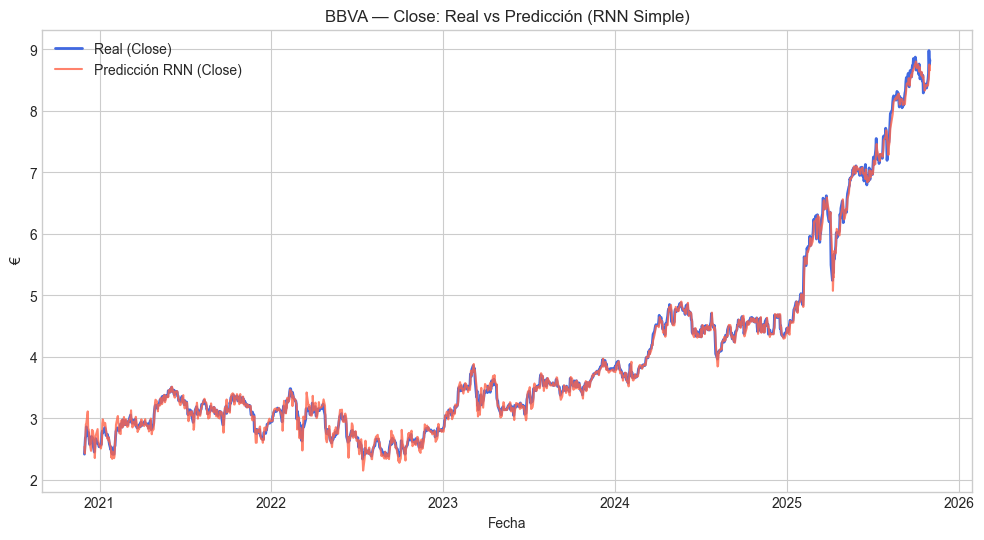

In [85]:
valid_dates = df_valid_scaled['Date'].iloc[lookback:].values

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true_inv.flatten(), label='Real (Close)', color='royalblue', linewidth=2)
plt.plot(valid_dates, val_preds_inv.flatten(), label='Predicción RNN (Close)', color='tomato', alpha=0.8)
plt.title('BBVA — Close: Real vs Predicción (RNN Simple)')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend()
plt.show()

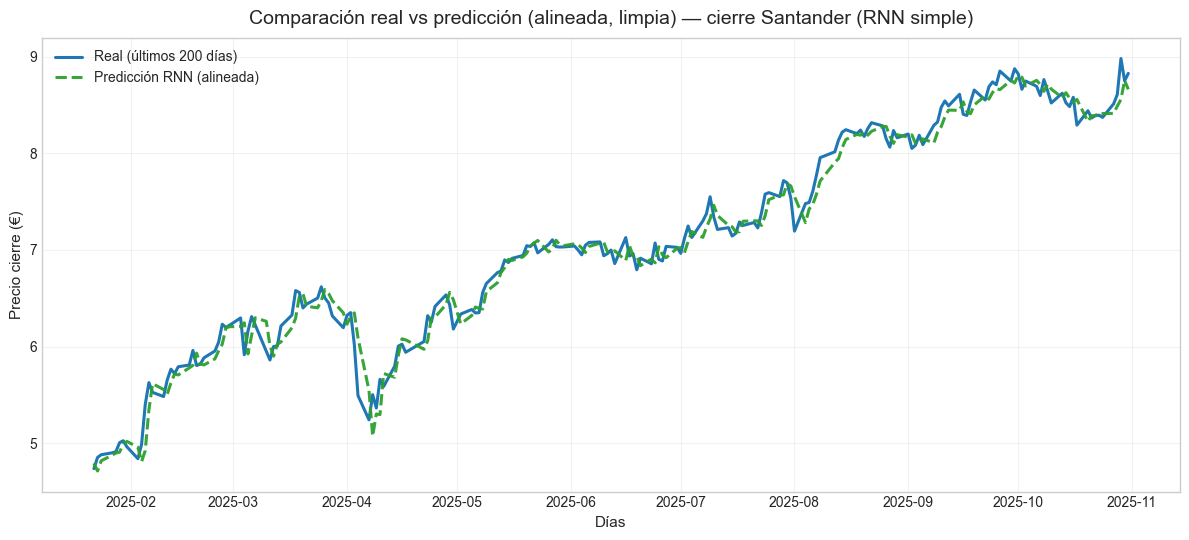

In [86]:
# ==========================================
# 📊 Comparación real vs predicción — RNN simple (en €)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # nº de días finales a mostrar (cámbialo si quieres)
normalize = False     # True para 0–1 en el tramo mostrado
smooth_sigma = 0      # 0 = sin suavizado | 2–3 = suavizado leve

# --- construir las fechas alineadas con las secuencias de validación ---
valid_dates_rnn = df_valid['Date'].iloc[lookback:lookback+len(val_true_inv)].reset_index(drop=True)

# --- asegurar longitudes coherentes ---
m = min(len(val_true_inv), len(val_preds_inv), len(valid_dates_rnn))
y_real_full = val_true_inv.flatten()[:m]
y_pred_full = val_preds_inv.flatten()[:m]
d_full      = np.array(valid_dates_rnn)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalización opcional (para comparar forma) ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"

# --- suavizado visual opcional ---
if smooth_sigma and smooth_sigma > 0:
    y_real_plot = gaussian_filter1d(y_real_plot, sigma=smooth_sigma)
    y_pred_plot = gaussian_filter1d(y_pred_plot, sigma=smooth_sigma)

# --- gráfico final (estilo limpio) ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label=f"Real (últimos {last_k} días)",
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción RNN (alineada)",
         color="#2ca02c", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre Santander (RNN simple)",
          fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [87]:
torch.save(model.state_dict(), "../models/RNN_santander2.pt")
joblib.dump(scaler_X, "../models/scaler_X_santanderRNN2.pkl")
joblib.dump(scaler_y, "../models/scaler_y_santanderRNN2.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados


### GRU

In [88]:
import torch
import torch.nn as nn

class GRURegressor(nn.Module):
    def __init__(self, n_features, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.gru = nn.GRU(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, _ = self.gru(x)      # (batch, seq, hidden)
        out = out[:, -1, :]       # último paso temporal
        return self.fc(out)

In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = X_train_seq.shape[2]
hidden_size = 64
num_layers = 2
dropout = 0.2
lr = 1e-3
max_epochs = 400  # tope; parará antes por early stopping

model_gru = GRURegressor(n_features, hidden_size, num_layers, dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_gru.parameters(), lr=lr)


best_val = float('inf')
best_state = None
patience = 12
patience_left = patience
tol = 1e-6

In [90]:
train_losses_gru, valid_losses_gru = [], []

for epoch in range(1, max_epochs+1):
    # ------- TRAIN -------
    model_gru.train()
    batch_losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model_gru(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_loss = float(np.mean(batch_losses))
    train_losses_gru.append(train_loss)

    # ------- VALID -------
    model_gru.eval()
    val_batch_losses = []
    with torch.no_grad():
        for xb, yb in valid_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model_gru(xb)
            val_loss = criterion(preds, yb).item()
            val_batch_losses.append(val_loss)
    valid_loss = float(np.mean(val_batch_losses))
    valid_losses_gru.append(valid_loss)

    print(f"Epoch {epoch:04d}/{max_epochs} | Train: {train_loss:.6f} | Valid: {valid_loss:.6f} | lr: {optimizer.param_groups[0]['lr']:.2e}")

    # Early stopping
    if valid_loss < best_val - tol:
        best_val = valid_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model_gru.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("⏹️ Early stopping (sin mejora)")
            break

# Restaurar mejor estado
if best_state is not None:
    model_gru.load_state_dict(best_state)
model_gru.eval()

Epoch 0001/400 | Train: 0.027393 | Valid: 0.000255 | lr: 1.00e-03
Epoch 0002/400 | Train: 0.000837 | Valid: 0.000122 | lr: 1.00e-03
Epoch 0003/400 | Train: 0.000638 | Valid: 0.000083 | lr: 1.00e-03
Epoch 0004/400 | Train: 0.000514 | Valid: 0.000072 | lr: 1.00e-03
Epoch 0005/400 | Train: 0.000440 | Valid: 0.000071 | lr: 1.00e-03
Epoch 0006/400 | Train: 0.000418 | Valid: 0.000078 | lr: 1.00e-03
Epoch 0007/400 | Train: 0.000392 | Valid: 0.000085 | lr: 1.00e-03
Epoch 0008/400 | Train: 0.000384 | Valid: 0.000085 | lr: 1.00e-03
Epoch 0009/400 | Train: 0.000350 | Valid: 0.000127 | lr: 1.00e-03
Epoch 0010/400 | Train: 0.000365 | Valid: 0.000134 | lr: 1.00e-03
Epoch 0011/400 | Train: 0.000345 | Valid: 0.000095 | lr: 1.00e-03
Epoch 0012/400 | Train: 0.000336 | Valid: 0.000097 | lr: 1.00e-03
Epoch 0013/400 | Train: 0.000319 | Valid: 0.000081 | lr: 1.00e-03
Epoch 0014/400 | Train: 0.000317 | Valid: 0.000088 | lr: 1.00e-03
Epoch 0015/400 | Train: 0.000288 | Valid: 0.000104 | lr: 1.00e-03
Epoch 0016

GRURegressor(
  (gru): GRU(11, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [91]:
# Predicciones en valid
val_preds_list, val_true_list = [], []
with torch.no_grad():
    for xb, yb in valid_loader:
        xb = xb.to(device)
        pred = model_gru(xb).cpu().numpy()
        val_preds_list.append(pred)
        val_true_list.append(yb.numpy())

val_preds_scaled = np.vstack(val_preds_list)
val_true_scaled  = np.vstack(val_true_list)

# Desescalar (target Close)
val_preds = scaler_y.inverse_transform(val_preds_scaled)
val_true  = scaler_y.inverse_transform(val_true_scaled)

# Métricas
rmse_valid = np.sqrt(((val_preds - val_true)**2).mean())
mae_valid  = np.abs(val_preds - val_true).mean()
mape_valid = (np.abs((val_preds - val_true)/val_true).mean() * 100)

print(f"✅ GRU — RMSE valid (€): {rmse_valid:.6f} | MAE: {mae_valid:.6f} | MAPE: {mape_valid:.3f}%")

✅ GRU — RMSE valid (€): 0.093920 | MAE: 0.069185 | MAPE: 1.829%


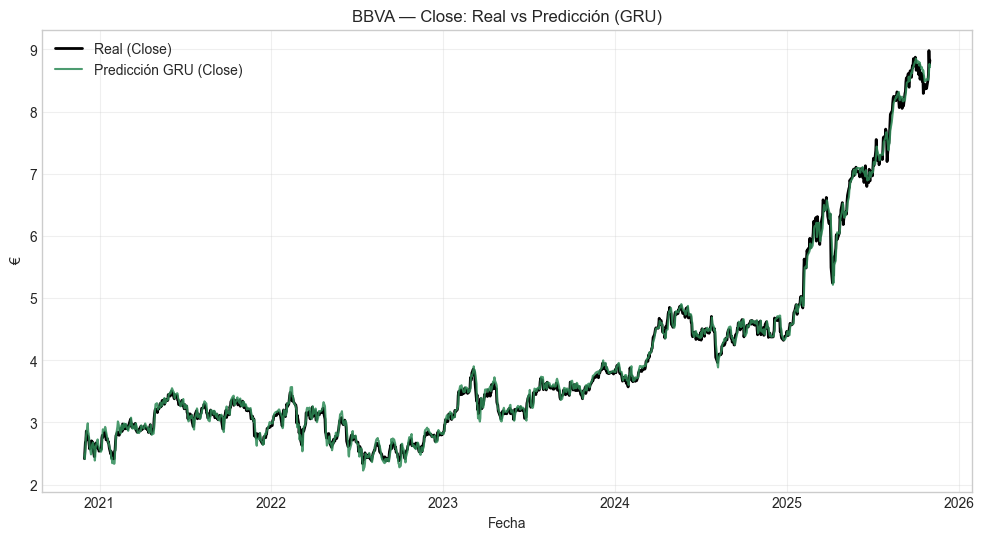

In [92]:
valid_dates = df_valid_scaled['Date'].iloc[lookback:].values

plt.figure(figsize=(12,6))
plt.plot(valid_dates, val_true.flatten(), label='Real (Close)', color='black', linewidth=2)
plt.plot(valid_dates, val_preds.flatten(), label='Predicción GRU (Close)', color='seagreen', alpha=0.85)
plt.title('BBVA — Close: Real vs Predicción (GRU)')
plt.xlabel('Fecha'); plt.ylabel('€'); plt.legend()
plt.grid(alpha=0.3)
plt.show()

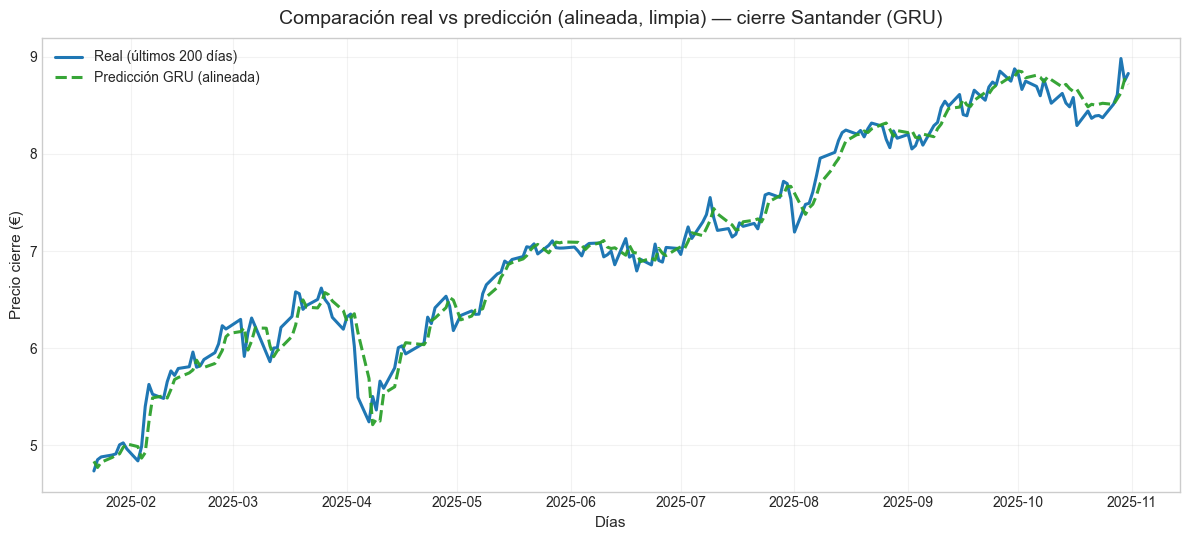

In [93]:
# ==========================================
# 📊 Comparación real vs predicción — GRU (en €)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# --- parámetros de visualización ---
last_k = 200          # nº de días finales a mostrar
normalize = False     # True → normaliza 0–1 en el tramo mostrado
smooth_sigma = 0      # 0 = sin suavizado | 2–3 = suavizado leve

# --- construir fechas alineadas con las secuencias de validación ---
valid_dates_gru = df_valid['Date'].iloc[lookback:lookback+len(val_true)].reset_index(drop=True)

# --- asegurar longitudes coherentes ---
m = min(len(val_true), len(val_preds), len(valid_dates_gru))
y_real_full = val_true.flatten()[:m]
y_pred_full = val_preds.flatten()[:m]
d_full      = np.array(valid_dates_gru)[:m]

# --- seleccionar tramo final ---
y_real_plot = y_real_full[-last_k:]
y_pred_plot = y_pred_full[-last_k:]
d_plot      = d_full[-last_k:]

# --- normalización opcional ---
if normalize:
    ymin = min(y_real_plot.min(), y_pred_plot.min())
    ymax = max(y_real_plot.max(), y_pred_plot.max())
    eps = 1e-9
    y_real_plot = (y_real_plot - ymin) / (ymax - ymin + eps)
    y_pred_plot = (y_pred_plot - ymin) / (ymax - ymin + eps)
    y_label = "Índice normalizado (0–1)"
else:
    y_label = "Precio cierre (€)"

# --- suavizado visual opcional ---
if smooth_sigma and smooth_sigma > 0:
    y_real_plot = gaussian_filter1d(y_real_plot, sigma=smooth_sigma)
    y_pred_plot = gaussian_filter1d(y_pred_plot, sigma=smooth_sigma)

# --- gráfico final ---
plt.figure(figsize=(12,5.5))
plt.plot(d_plot, y_real_plot, label=f"Real (últimos {last_k} días)",
         color="#1f77b4", linewidth=2.2)
plt.plot(d_plot, y_pred_plot, label="Predicción GRU (alineada)",
         color="#2ca02c", linestyle="--", linewidth=2.2, alpha=0.95)

plt.title("Comparación real vs predicción (alineada, limpia) — cierre Santander (GRU)",
          fontsize=14, pad=10)
plt.xlabel("Días", fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


In [94]:
torch.save(model_gru.state_dict(), "../models/GRU_santander2.pt")
joblib.dump(scaler_X, "../models/scaler_X_santanderGRU2.pkl")
joblib.dump(scaler_y, "../models/scaler_y_santanderGRU2.pkl")
print("✅ Modelo y scalers guardados")

✅ Modelo y scalers guardados


In [95]:
# ==========================================
# 🔧 Utilidades para estandarizar predicciones por modelo
# ==========================================
import numpy as np
import pandas as pd

def build_aligned_df(valid_dates_like, y_true, y_pred, model_name, last_k=None):
    """Devuelve un DataFrame con Date, y_true, y_pred, Model; recorta al final si last_k."""
    m = min(len(valid_dates_like), len(y_true), len(y_pred))
    d = pd.to_datetime(np.array(valid_dates_like)[:m])
    t = np.array(y_true).reshape(-1)[:m]
    p = np.array(y_pred).reshape(-1)[:m]
    df_out = pd.DataFrame({"Date": d, "y_true": t, "y_pred": p, "Model": model_name})
    if last_k is not None and last_k > 0:
        df_out = df_out.tail(last_k).reset_index(drop=True)
    return df_out

def try_collect_lstm(last_k=63):
    # LSTM en tu notebook creó: valid_dates (df_valid['Date'].iloc[lookback:])
    # y val_true, val_preds DES-ESCALADOS
    try:
        return build_aligned_df(valid_dates, val_true, val_preds, "LSTM", last_k)
    except NameError:
        print("⚠️ No encuentro variables de LSTM (valid_dates/val_true/val_preds). Reejecuta celdas 21–23.")
        return pd.DataFrame()

def try_collect_rnn(last_k=63):
    # RNN simple: valid_dates_rnn y val_true_inv / val_preds_inv
    try:
        return build_aligned_df(valid_dates_rnn, val_true_inv, val_preds_inv, "RNN", last_k)
    except NameError:
        print("⚠️ No encuentro variables de RNN (valid_dates_rnn/val_true_inv/val_preds_inv). Reejecuta celdas 29–31.")
        return pd.DataFrame()

def try_collect_gru(last_k=63):
    # GRU: valid_dates y val_true / val_preds DES-ESCALADOS
    try:
        return build_aligned_df(valid_dates, val_true, val_preds, "GRU", last_k)
    except NameError:
        print("⚠️ No encuentro variables de GRU (valid_dates/val_true/val_preds). Reejecuta celdas 36–38.")
        return pd.DataFrame()

In [96]:
last_k = 63  # ~3 meses bursátiles

df_lstm = try_collect_lstm(last_k=last_k)
df_rnn  = try_collect_rnn(last_k=last_k)
df_gru  = try_collect_gru(last_k=last_k)

In [97]:
# ==========================================
# 🧮 Métricas rápidas en zoom (DA/MAE/MAPE)
# ==========================================
import numpy as np

def quick_metrics(df_zoom):
    if df_zoom.empty:
        return None
    y = df_zoom["y_true"].values
    p = df_zoom["y_pred"].values
    mae  = np.abs(p - y).mean()
    mape = (np.abs((p - y)/y).mean()*100)
    # Directional Accuracy: compara (y_t - y_{t-1}) vs (p_t - y_{t-1})
    dy_real = np.sign(np.diff(y))
    dy_pred = np.sign(p[1:] - y[:-1])
    da = (dy_real == dy_pred).mean()*100
    return {"MAE": mae, "MAPE(%)": mape, "DA(%)": da}

for name, dfz in [("LSTM", df_lstm), ("RNN", df_rnn), ("GRU", df_gru)]:
    m = quick_metrics(dfz)
    if m:
        print(f"{name} → MAE: {m['MAE']:.4f} | MAPE: {m['MAPE(%)']:.2f}% | DA: {m['DA(%)']:.1f}%")

LSTM → MAE: 0.1106 | MAPE: 1.32% | DA: 50.0%
RNN → MAE: 0.1038 | MAPE: 1.23% | DA: 54.8%
GRU → MAE: 0.1106 | MAPE: 1.32% | DA: 50.0%


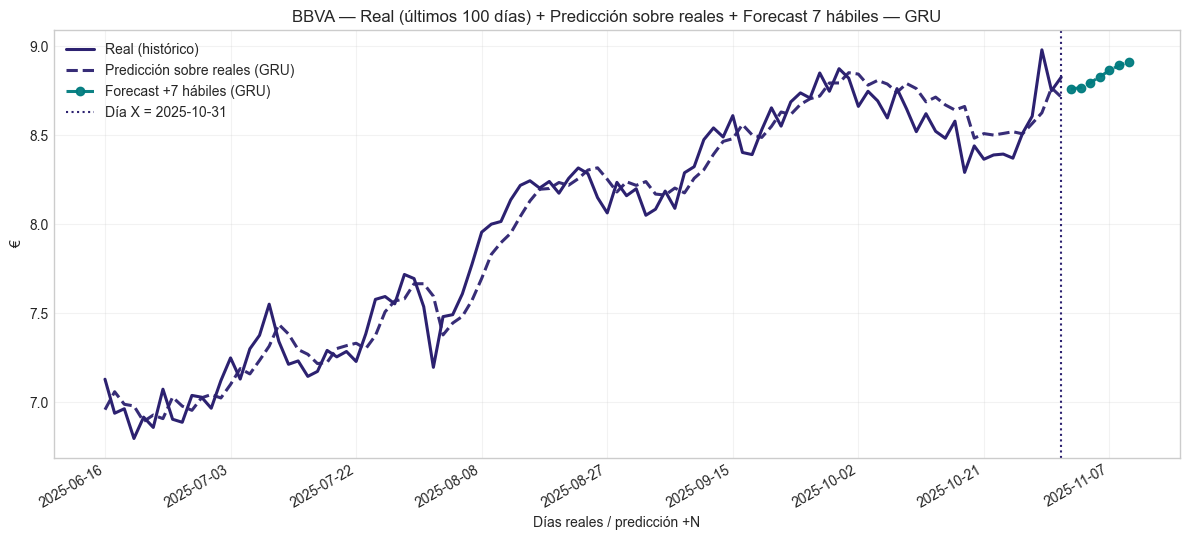

In [98]:
# ==========================================
# 📈 Real (últimos n_hist) + Predicción sobre reales + Forecast 7 hábiles
# Versión Opción 2: eje extendido con "+1 ... +7" para separar bien los puntos
# ==========================================
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

# ----------------- Parámetros -----------------
model_name     = "GRU"   # "GRU" | "LSTM" | "RNN"
n_hist         = 100     # días históricos a mostrar antes del forecast
future_horizon = 7       # nº de días hábiles a predecir

# ----------------- Selección de modelo -----------------
models = {
    "LSTM": locals().get("model", None),      # tu LSTM se llama 'model'
    "GRU":  locals().get("model_gru", None),
    "RNN":  locals().get("model_rnn", None),
}
model = models.get(model_name)
assert model is not None, f"No encuentro el modelo '{model_name}'. ¿Has ejecutado su entrenamiento?"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

# ----------------- Datos y escalado -----------------
df_full = df_actualizado.copy().sort_values("Date").reset_index(drop=True)
df_full["Date"] = pd.to_datetime(df_full["Date"])

# Columnas continuas como en tu cuaderno (NO escalar 'Return' ni 'evento_negativo')
cont_cols = [c for c in feature_cols if c not in ["evento_negativo", "Return"]]

# Escalar features con scaler_X (ajustado solo en train)
df_scaled = df_full.copy()
df_scaled[cont_cols] = scaler_X.transform(df_full[cont_cols])

# ----------------- Predicción one-step sobre datos reales (toda la serie) -----------------
def create_sequences(mat, lb):
    Xs = []
    for i in range(len(mat) - lb):
        Xs.append(mat[i:i+lb])
    return np.array(Xs)

X_all = df_scaled[feature_cols].astype(float).values
dates_all = df_full["Date"].values

X_seq = create_sequences(X_all, lookback)  # (N-lookback, lookback, n_features)
dates_seq = dates_all[lookback:]           # fechas del target/pred

with torch.no_grad():
    y_pred_scaled = model(torch.tensor(X_seq, dtype=torch.float32, device=device)).cpu().numpy().reshape(-1,1)

# Desescalar a euros con scaler_y
y_pred_on_real = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)
y_real_aligned = df_full["Close"].values[lookback:]

# Cortar a últimos n_hist puntos
y_real_tail = y_real_aligned[-n_hist:]
y_pred_tail = y_pred_on_real[-n_hist:]
dates_tail  = pd.to_datetime(dates_seq[-n_hist:])

# ----------------- Forecast futuro (7 hábiles, recursivo) -----------------
window_raw = df_full.tail(lookback).copy()
buf_raw = df_full.copy()

future_dates = []
future_preds_eur = []

for _ in range(future_horizon):
    # Escalar ventana y predecir
    w_scaled = window_raw.copy()
    w_scaled[cont_cols] = scaler_X.transform(window_raw[cont_cols])
    X_seq = w_scaled[feature_cols].astype(float).values
    xb = torch.tensor(X_seq, dtype=torch.float32, device=device).unsqueeze(0)

    with torch.no_grad():
        y_hat_scaled = model(xb).cpu().numpy().reshape(-1,1)

    y_hat = scaler_y.inverse_transform(y_hat_scaled).reshape(-1)[0]  # € predicho

    # Siguiente fecha hábil
    next_date = pd.to_datetime(buf_raw["Date"].iloc[-1]) + BDay(1)
    future_dates.append(next_date)
    future_preds_eur.append(y_hat)

    # Nueva fila sintética + recalcular derivados crudos
    last_row = buf_raw.iloc[-1].copy()
    new_row = last_row.copy()
    new_row["Date"]  = next_date
    new_row["Open"]  = y_hat
    new_row["High"]  = max(y_hat, last_row["High"])
    new_row["Low"]   = min(y_hat, last_row["Low"])
    new_row["Close"] = y_hat
    new_row["Volume"] = last_row["Volume"]
    new_row["evento_negativo"] = 0

    buf_raw = pd.concat([buf_raw, pd.DataFrame([new_row])], ignore_index=True)

    buf_raw["Return"]        = buf_raw["Close"].pct_change()
    buf_raw["MA_7"]          = buf_raw["Close"].rolling(7).mean()
    buf_raw["MA_30"]         = buf_raw["Close"].rolling(30).mean()
    buf_raw["Volatility_30"] = buf_raw["Return"].rolling(30).std()
    buf_raw["Range"]         = buf_raw["High"] - buf_raw["Low"]
    buf_raw["Body"]          = (buf_raw["Close"] - buf_raw["Open"]).abs()

    window_raw = buf_raw.tail(lookback).copy()

df_future = pd.DataFrame({"Date": future_dates, "Forecast": future_preds_eur})

# ----------------- Plot — Eje extendido con "+1 ... +7" -----------------
plt.figure(figsize=(12,5.5))

# Eje X extendido: reales = 0..n_hist-1 ; forecast = n_hist..n_hist+6
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))  # coincide con x_real
x_fore = np.arange(len(y_real_tail), len(y_real_tail) + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
plt.plot(x_pred, y_pred_tail, "--", label=f"Predicción sobre reales ({model_name})", linewidth=2.2, alpha=0.95, color="#2C2170")
plt.plot(x_fore, df_future["Forecast"].values, "--o", label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F")

# Línea vertical en el último real (Día X)
plt.axvline(len(y_real_tail)-1, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

from itertools import chain

# Combinar fechas reales y futuras en formato fecha real
all_dates = list(chain(dates_tail, df_future["Date"].values))
all_y = list(chain(y_real_tail, df_future["Forecast"].values))

# Definir posición y etiquetas (solo fechas)
step = max(1, len(all_dates)//8)
tick_pos = np.arange(0, len(all_dates), step)
tick_lbl = [pd.to_datetime(d).strftime("%Y-%m-%d") for d in np.array(all_dates)[::step]]

plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(frameon=False); plt.grid(alpha=0.25); plt.tight_layout(); plt.show()

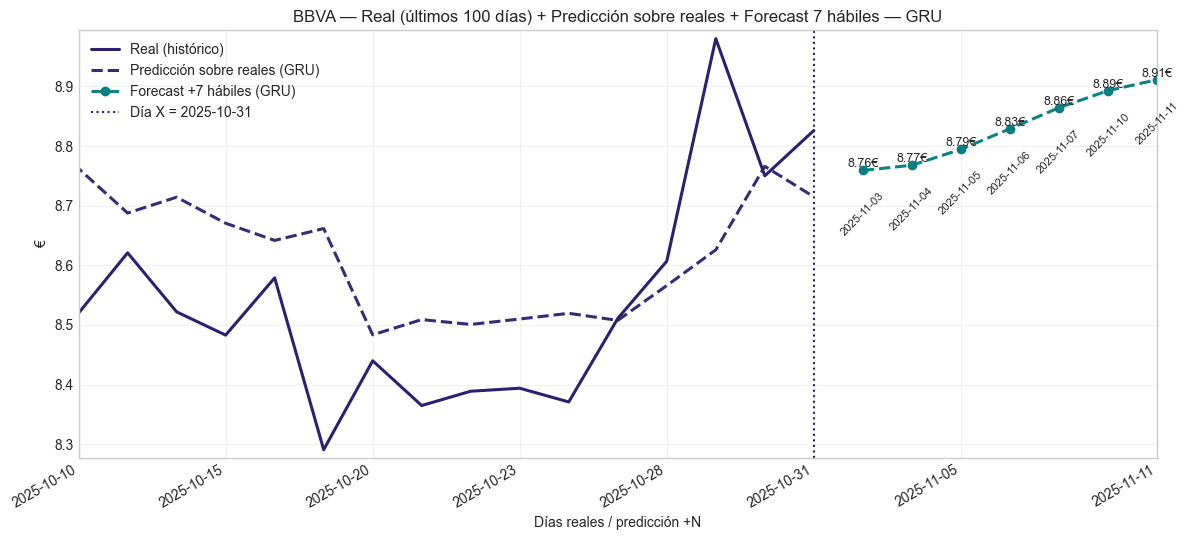

In [99]:
# ----------------- Plot — zoom + corte en Día X y forecast justo después -----------------
plt.figure(figsize=(12,5.5))

last_idx_real = len(y_real_tail) - 1  # índice del Día X dentro del tramo mostrado

# Ejes X: reales [0..last_idx_real], forecast [last_idx_real+1 ..]
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))            # mismo tamaño que reales
x_fore = np.arange(last_idx_real+1, last_idx_real+1 + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
# ❗️Cortar la predicción sobre reales EXACTAMENTE en el Día X
plt.plot(x_pred[:last_idx_real+1], y_pred_tail[:last_idx_real+1],
         "--", label=f"Predicción sobre reales ({model_name})",
         linewidth=2.2, alpha=0.95, color="#2C2170")

# Forecast empieza justo después del Día X
plt.plot(x_fore, df_future["Forecast"].values, "--o",
         label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F", markersize=6)

# Línea vertical en el Día X
plt.axvline(last_idx_real, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

# === ZOOM: últimos 'zoom_hist' días reales + forecast ===
zoom_hist = 15
left = max(0, last_idx_real - zoom_hist)
right = last_idx_real + len(df_future)
plt.xlim(left, right)

# Límites verticales ajustados al rango visible
vals_vis = np.concatenate([y_real_tail[left:], df_future["Forecast"].values])
pad = 0.02 * max(1e-6, (vals_vis.max() - vals_vis.min()))
plt.ylim(vals_vis.min() - pad, vals_vis.max() + pad)

# Etiquetas con valores y fecha en cada punto del forecast
date_labels = pd.to_datetime(df_future["Date"]).dt.strftime("%Y-%m-%d").to_numpy()
for x, y, d in zip(x_fore, df_future["Forecast"].values, date_labels):
    plt.text(x, y, f"{y:.2f}€", va="bottom", ha="center", fontsize=9)
    plt.text(x, y - (vals_vis.max()-vals_vis.min())*0.05, d, va="top", ha="center",
             fontsize=8, rotation=45)

# Ticks del eje X: solo fechas (reales del zoom + futuras)
from itertools import chain
all_dates = np.array(list(chain(dates_tail, df_future["Date"].values)))
date_labels_full = pd.to_datetime(all_dates).strftime("%Y-%m-%d").to_numpy()
tick_pos = np.linspace(left, right, num=min(8, right-left+1)).astype(int)
tick_lbl = date_labels_full[tick_pos]
plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(loc="upper left", frameon=False)  # 👈 leyenda arriba a la izquierda
plt.grid(alpha=0.25); plt.tight_layout(); plt.show()

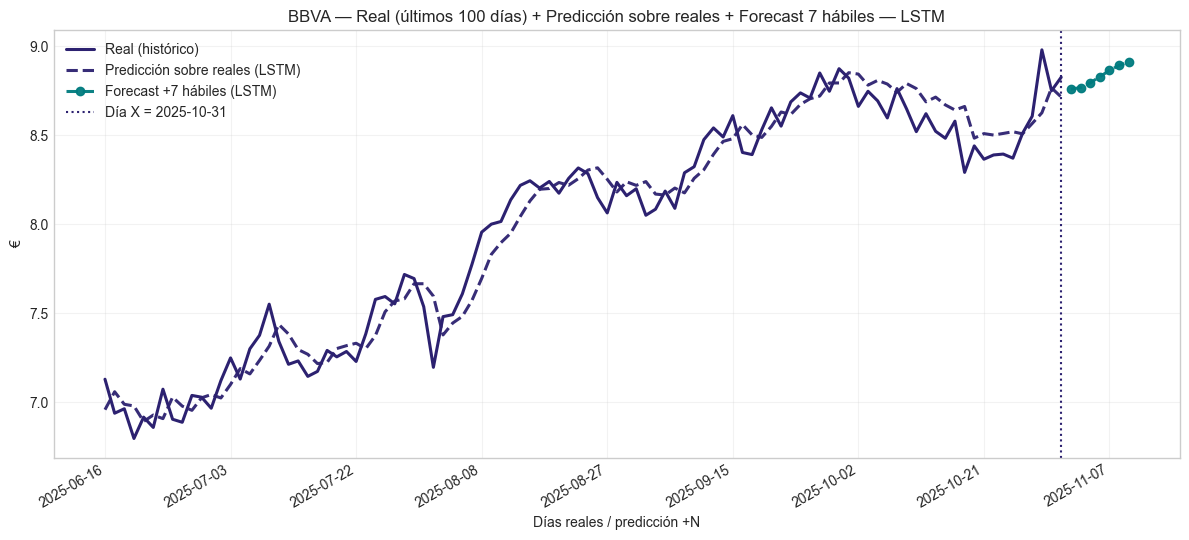

In [100]:
# ==========================================
# 📈 Real (últimos n_hist) + Predicción sobre reales + Forecast 7 hábiles
# Versión Opción 2: eje extendido con "+1 ... +7" para separar bien los puntos
# ==========================================
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

# ----------------- Parámetros -----------------
model_name     = "LSTM"   # "GRU" | "LSTM" | "RNN"
n_hist         = 100     # días históricos a mostrar antes del forecast
future_horizon = 7       # nº de días hábiles a predecir

# ----------------- Selección de modelo -----------------
models = {
    "LSTM": locals().get("model", None),      # tu LSTM se llama 'model'
    "GRU":  locals().get("model_gru", None),
    "RNN":  locals().get("model_rnn", None),
}
model = models.get(model_name)
assert model is not None, f"No encuentro el modelo '{model_name}'. ¿Has ejecutado su entrenamiento?"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

# ----------------- Datos y escalado -----------------
df_full = df_actualizado.copy().sort_values("Date").reset_index(drop=True)
df_full["Date"] = pd.to_datetime(df_full["Date"])

# Columnas continuas como en tu cuaderno (NO escalar 'Return' ni 'evento_negativo')
cont_cols = [c for c in feature_cols if c not in ["evento_negativo", "Return"]]

# Escalar features con scaler_X (ajustado solo en train)
df_scaled = df_full.copy()
df_scaled[cont_cols] = scaler_X.transform(df_full[cont_cols])

# ----------------- Predicción one-step sobre datos reales (toda la serie) -----------------
def create_sequences(mat, lb):
    Xs = []
    for i in range(len(mat) - lb):
        Xs.append(mat[i:i+lb])
    return np.array(Xs)

X_all = df_scaled[feature_cols].astype(float).values
dates_all = df_full["Date"].values

X_seq = create_sequences(X_all, lookback)  # (N-lookback, lookback, n_features)
dates_seq = dates_all[lookback:]           # fechas del target/pred

with torch.no_grad():
    y_pred_scaled = model(torch.tensor(X_seq, dtype=torch.float32, device=device)).cpu().numpy().reshape(-1,1)

# Desescalar a euros con scaler_y
y_pred_on_real = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)
y_real_aligned = df_full["Close"].values[lookback:]

# Cortar a últimos n_hist puntos
y_real_tail = y_real_aligned[-n_hist:]
y_pred_tail = y_pred_on_real[-n_hist:]
dates_tail  = pd.to_datetime(dates_seq[-n_hist:])

# ----------------- Forecast futuro (7 hábiles, recursivo) -----------------
window_raw = df_full.tail(lookback).copy()
buf_raw = df_full.copy()

future_dates = []
future_preds_eur = []

for _ in range(future_horizon):
    # Escalar ventana y predecir
    w_scaled = window_raw.copy()
    w_scaled[cont_cols] = scaler_X.transform(window_raw[cont_cols])
    X_seq = w_scaled[feature_cols].astype(float).values
    xb = torch.tensor(X_seq, dtype=torch.float32, device=device).unsqueeze(0)

    with torch.no_grad():
        y_hat_scaled = model(xb).cpu().numpy().reshape(-1,1)

    y_hat = scaler_y.inverse_transform(y_hat_scaled).reshape(-1)[0]  # € predicho

    # Siguiente fecha hábil
    next_date = pd.to_datetime(buf_raw["Date"].iloc[-1]) + BDay(1)
    future_dates.append(next_date)
    future_preds_eur.append(y_hat)

    # Nueva fila sintética + recalcular derivados crudos
    last_row = buf_raw.iloc[-1].copy()
    new_row = last_row.copy()
    new_row["Date"]  = next_date
    new_row["Open"]  = y_hat
    new_row["High"]  = max(y_hat, last_row["High"])
    new_row["Low"]   = min(y_hat, last_row["Low"])
    new_row["Close"] = y_hat
    new_row["Volume"] = last_row["Volume"]
    new_row["evento_negativo"] = 0

    buf_raw = pd.concat([buf_raw, pd.DataFrame([new_row])], ignore_index=True)

    buf_raw["Return"]        = buf_raw["Close"].pct_change()
    buf_raw["MA_7"]          = buf_raw["Close"].rolling(7).mean()
    buf_raw["MA_30"]         = buf_raw["Close"].rolling(30).mean()
    buf_raw["Volatility_30"] = buf_raw["Return"].rolling(30).std()
    buf_raw["Range"]         = buf_raw["High"] - buf_raw["Low"]
    buf_raw["Body"]          = (buf_raw["Close"] - buf_raw["Open"]).abs()

    window_raw = buf_raw.tail(lookback).copy()

df_future = pd.DataFrame({"Date": future_dates, "Forecast": future_preds_eur})

# ----------------- Plot — Eje extendido con "+1 ... +7" -----------------
plt.figure(figsize=(12,5.5))

# Eje X extendido: reales = 0..n_hist-1 ; forecast = n_hist..n_hist+6
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))  # coincide con x_real
x_fore = np.arange(len(y_real_tail), len(y_real_tail) + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
plt.plot(x_pred, y_pred_tail, "--", label=f"Predicción sobre reales ({model_name})", linewidth=2.2, alpha=0.95, color="#2C2170")
plt.plot(x_fore, df_future["Forecast"].values, "--o", label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F")

# Línea vertical en el último real (Día X)
plt.axvline(len(y_real_tail)-1, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

from itertools import chain

# Combinar fechas reales y futuras en formato fecha real
all_dates = list(chain(dates_tail, df_future["Date"].values))
all_y = list(chain(y_real_tail, df_future["Forecast"].values))

# Definir posición y etiquetas (solo fechas)
step = max(1, len(all_dates)//8)
tick_pos = np.arange(0, len(all_dates), step)
tick_lbl = [pd.to_datetime(d).strftime("%Y-%m-%d") for d in np.array(all_dates)[::step]]

plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(frameon=False); plt.grid(alpha=0.25); plt.tight_layout(); plt.show()

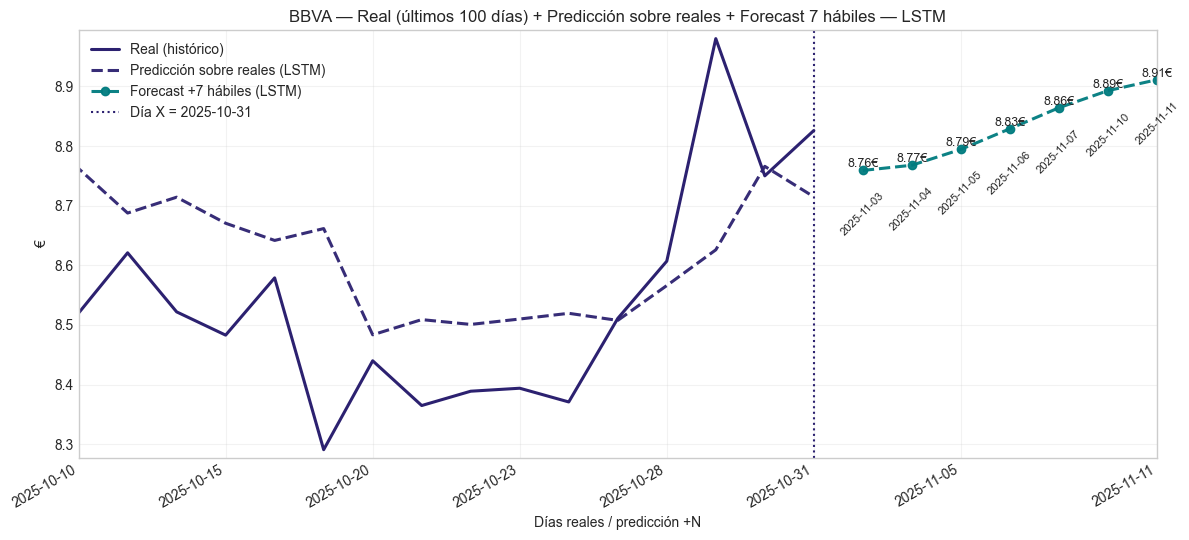

In [101]:
# ----------------- Plot — zoom + corte en Día X y forecast justo después -----------------
plt.figure(figsize=(12,5.5))

last_idx_real = len(y_real_tail) - 1  # índice del Día X dentro del tramo mostrado

# Ejes X: reales [0..last_idx_real], forecast [last_idx_real+1 ..]
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))            # mismo tamaño que reales
x_fore = np.arange(last_idx_real+1, last_idx_real+1 + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
# ❗️Cortar la predicción sobre reales EXACTAMENTE en el Día X
plt.plot(x_pred[:last_idx_real+1], y_pred_tail[:last_idx_real+1],
         "--", label=f"Predicción sobre reales ({model_name})",
         linewidth=2.2, alpha=0.95, color="#2C2170")

# Forecast empieza justo después del Día X
plt.plot(x_fore, df_future["Forecast"].values, "--o",
         label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F", markersize=6)

# Línea vertical en el Día X
plt.axvline(last_idx_real, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

# === ZOOM: últimos 'zoom_hist' días reales + forecast ===
zoom_hist = 15
left = max(0, last_idx_real - zoom_hist)
right = last_idx_real + len(df_future)
plt.xlim(left, right)

# Límites verticales ajustados al rango visible
vals_vis = np.concatenate([y_real_tail[left:], df_future["Forecast"].values])
pad = 0.02 * max(1e-6, (vals_vis.max() - vals_vis.min()))
plt.ylim(vals_vis.min() - pad, vals_vis.max() + pad)

# Etiquetas con valores y fecha en cada punto del forecast
date_labels = pd.to_datetime(df_future["Date"]).dt.strftime("%Y-%m-%d").to_numpy()
for x, y, d in zip(x_fore, df_future["Forecast"].values, date_labels):
    plt.text(x, y, f"{y:.2f}€", va="bottom", ha="center", fontsize=9)
    plt.text(x, y - (vals_vis.max()-vals_vis.min())*0.05, d, va="top", ha="center",
             fontsize=8, rotation=45)

# Ticks del eje X: solo fechas (reales del zoom + futuras)
from itertools import chain
all_dates = np.array(list(chain(dates_tail, df_future["Date"].values)))
date_labels_full = pd.to_datetime(all_dates).strftime("%Y-%m-%d").to_numpy()
tick_pos = np.linspace(left, right, num=min(8, right-left+1)).astype(int)
tick_lbl = date_labels_full[tick_pos]
plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(loc="upper left", frameon=False)  # 👈 leyenda arriba a la izquierda
plt.grid(alpha=0.25); plt.tight_layout(); plt.show()

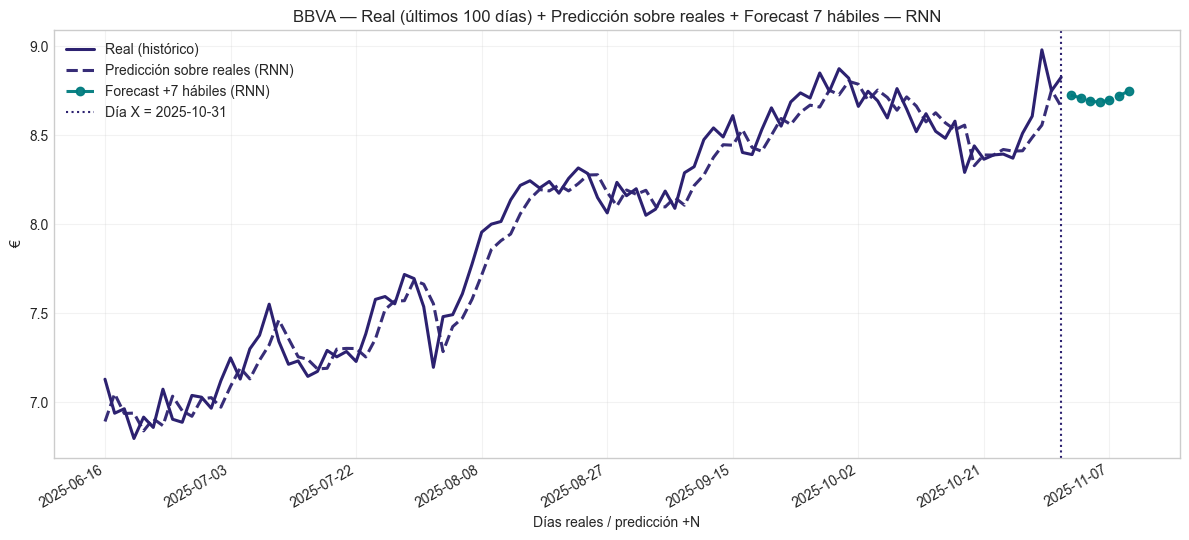

In [102]:
# ==========================================
# 📈 Real (últimos n_hist) + Predicción sobre reales + Forecast 7 hábiles
# Versión Opción 2: eje extendido con "+1 ... +7" para separar bien los puntos
# ==========================================
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

# ----------------- Parámetros -----------------
model_name     = "RNN"   # "GRU" | "LSTM" | "RNN"
n_hist         = 100     # días históricos a mostrar antes del forecast
future_horizon = 7       # nº de días hábiles a predecir

# ----------------- Selección de modelo -----------------
models = {
    "LSTM": locals().get("model", None),      # tu LSTM se llama 'model'
    "GRU":  locals().get("model_gru", None),
    "RNN":  locals().get("model_rnn", None),
}
model = models.get(model_name)
assert model is not None, f"No encuentro el modelo '{model_name}'. ¿Has ejecutado su entrenamiento?"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

# ----------------- Datos y escalado -----------------
df_full = df_actualizado.copy().sort_values("Date").reset_index(drop=True)
df_full["Date"] = pd.to_datetime(df_full["Date"])

# Columnas continuas como en tu cuaderno (NO escalar 'Return' ni 'evento_negativo')
cont_cols = [c for c in feature_cols if c not in ["evento_negativo", "Return"]]

# Escalar features con scaler_X (ajustado solo en train)
df_scaled = df_full.copy()
df_scaled[cont_cols] = scaler_X.transform(df_full[cont_cols])

# ----------------- Predicción one-step sobre datos reales (toda la serie) -----------------
def create_sequences(mat, lb):
    Xs = []
    for i in range(len(mat) - lb):
        Xs.append(mat[i:i+lb])
    return np.array(Xs)

X_all = df_scaled[feature_cols].astype(float).values
dates_all = df_full["Date"].values

X_seq = create_sequences(X_all, lookback)  # (N-lookback, lookback, n_features)
dates_seq = dates_all[lookback:]           # fechas del target/pred

with torch.no_grad():
    y_pred_scaled = model(torch.tensor(X_seq, dtype=torch.float32, device=device)).cpu().numpy().reshape(-1,1)

# Desescalar a euros con scaler_y
y_pred_on_real = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)
y_real_aligned = df_full["Close"].values[lookback:]

# Cortar a últimos n_hist puntos
y_real_tail = y_real_aligned[-n_hist:]
y_pred_tail = y_pred_on_real[-n_hist:]
dates_tail  = pd.to_datetime(dates_seq[-n_hist:])

# ----------------- Forecast futuro (7 hábiles, recursivo) -----------------
window_raw = df_full.tail(lookback).copy()
buf_raw = df_full.copy()

future_dates = []
future_preds_eur = []

for _ in range(future_horizon):
    # Escalar ventana y predecir
    w_scaled = window_raw.copy()
    w_scaled[cont_cols] = scaler_X.transform(window_raw[cont_cols])
    X_seq = w_scaled[feature_cols].astype(float).values
    xb = torch.tensor(X_seq, dtype=torch.float32, device=device).unsqueeze(0)

    with torch.no_grad():
        y_hat_scaled = model(xb).cpu().numpy().reshape(-1,1)

    y_hat = scaler_y.inverse_transform(y_hat_scaled).reshape(-1)[0]  # € predicho

    # Siguiente fecha hábil
    next_date = pd.to_datetime(buf_raw["Date"].iloc[-1]) + BDay(1)
    future_dates.append(next_date)
    future_preds_eur.append(y_hat)

    # Nueva fila sintética + recalcular derivados crudos
    last_row = buf_raw.iloc[-1].copy()
    new_row = last_row.copy()
    new_row["Date"]  = next_date
    new_row["Open"]  = y_hat
    new_row["High"]  = max(y_hat, last_row["High"])
    new_row["Low"]   = min(y_hat, last_row["Low"])
    new_row["Close"] = y_hat
    new_row["Volume"] = last_row["Volume"]
    new_row["evento_negativo"] = 0

    buf_raw = pd.concat([buf_raw, pd.DataFrame([new_row])], ignore_index=True)

    buf_raw["Return"]        = buf_raw["Close"].pct_change()
    buf_raw["MA_7"]          = buf_raw["Close"].rolling(7).mean()
    buf_raw["MA_30"]         = buf_raw["Close"].rolling(30).mean()
    buf_raw["Volatility_30"] = buf_raw["Return"].rolling(30).std()
    buf_raw["Range"]         = buf_raw["High"] - buf_raw["Low"]
    buf_raw["Body"]          = (buf_raw["Close"] - buf_raw["Open"]).abs()

    window_raw = buf_raw.tail(lookback).copy()

df_future = pd.DataFrame({"Date": future_dates, "Forecast": future_preds_eur})

# ----------------- Plot — Eje extendido con "+1 ... +7" -----------------
plt.figure(figsize=(12,5.5))

# Eje X extendido: reales = 0..n_hist-1 ; forecast = n_hist..n_hist+6
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))  # coincide con x_real
x_fore = np.arange(len(y_real_tail), len(y_real_tail) + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
plt.plot(x_pred, y_pred_tail, "--", label=f"Predicción sobre reales ({model_name})", linewidth=2.2, alpha=0.95, color="#2C2170")
plt.plot(x_fore, df_future["Forecast"].values, "--o", label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F")

# Línea vertical en el último real (Día X)
plt.axvline(len(y_real_tail)-1, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

from itertools import chain

# Combinar fechas reales y futuras en formato fecha real
all_dates = list(chain(dates_tail, df_future["Date"].values))
all_y = list(chain(y_real_tail, df_future["Forecast"].values))

# Definir posición y etiquetas (solo fechas)
step = max(1, len(all_dates)//8)
tick_pos = np.arange(0, len(all_dates), step)
tick_lbl = [pd.to_datetime(d).strftime("%Y-%m-%d") for d in np.array(all_dates)[::step]]

plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(frameon=False); plt.grid(alpha=0.25); plt.tight_layout(); plt.show()

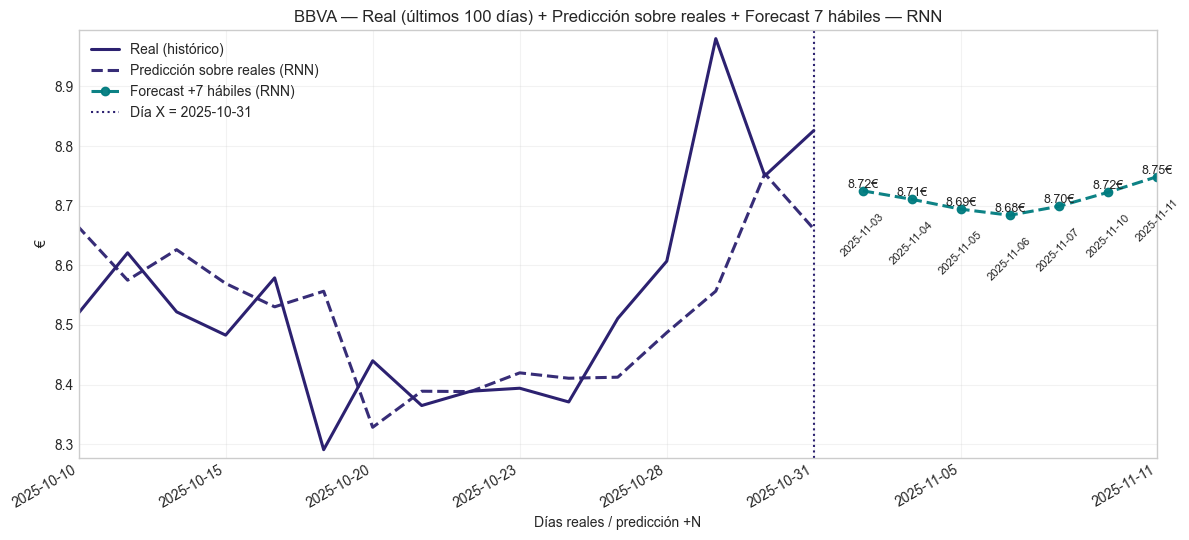

In [103]:
# ----------------- Plot — zoom + corte en Día X y forecast justo después -----------------
plt.figure(figsize=(12,5.5))

last_idx_real = len(y_real_tail) - 1  # índice del Día X dentro del tramo mostrado

# Ejes X: reales [0..last_idx_real], forecast [last_idx_real+1 ..]
x_real = np.arange(len(y_real_tail))
x_pred = np.arange(len(y_pred_tail))            # mismo tamaño que reales
x_fore = np.arange(last_idx_real+1, last_idx_real+1 + len(df_future))

# Curvas
plt.plot(x_real, y_real_tail, label="Real (histórico)", linewidth=2.2, color="#2C2170")
# ❗️Cortar la predicción sobre reales EXACTAMENTE en el Día X
plt.plot(x_pred[:last_idx_real+1], y_pred_tail[:last_idx_real+1],
         "--", label=f"Predicción sobre reales ({model_name})",
         linewidth=2.2, alpha=0.95, color="#2C2170")

# Forecast empieza justo después del Día X
plt.plot(x_fore, df_future["Forecast"].values, "--o",
         label=f"Forecast +{len(df_future)} hábiles ({model_name})",
         linewidth=2.2, alpha=0.95, color="#007B7F", markersize=6)

# Línea vertical en el Día X
plt.axvline(last_idx_real, linestyle=":", linewidth=1.5, color="#2C2170",
            label=f"Día X = {pd.to_datetime(dates_tail[-1]).date()}")

# === ZOOM: últimos 'zoom_hist' días reales + forecast ===
zoom_hist = 15
left = max(0, last_idx_real - zoom_hist)
right = last_idx_real + len(df_future)
plt.xlim(left, right)

# Límites verticales ajustados al rango visible
vals_vis = np.concatenate([y_real_tail[left:], df_future["Forecast"].values])
pad = 0.02 * max(1e-6, (vals_vis.max() - vals_vis.min()))
plt.ylim(vals_vis.min() - pad, vals_vis.max() + pad)

# Etiquetas con valores y fecha en cada punto del forecast
date_labels = pd.to_datetime(df_future["Date"]).dt.strftime("%Y-%m-%d").to_numpy()
for x, y, d in zip(x_fore, df_future["Forecast"].values, date_labels):
    plt.text(x, y, f"{y:.2f}€", va="bottom", ha="center", fontsize=9)
    plt.text(x, y - (vals_vis.max()-vals_vis.min())*0.05, d, va="top", ha="center",
             fontsize=8, rotation=45)

# Ticks del eje X: solo fechas (reales del zoom + futuras)
from itertools import chain
all_dates = np.array(list(chain(dates_tail, df_future["Date"].values)))
date_labels_full = pd.to_datetime(all_dates).strftime("%Y-%m-%d").to_numpy()
tick_pos = np.linspace(left, right, num=min(8, right-left+1)).astype(int)
tick_lbl = date_labels_full[tick_pos]
plt.xticks(tick_pos, tick_lbl, rotation=30, ha="right")

plt.title(f"BBVA — Real (últimos {len(y_real_tail)} días) + Predicción sobre reales + Forecast {len(df_future)} hábiles — {model_name}")
plt.xlabel("Días reales / predicción +N"); plt.ylabel("€")
plt.legend(loc="upper left", frameon=False)  # 👈 leyenda arriba a la izquierda
plt.grid(alpha=0.25); plt.tight_layout(); plt.show()


In [104]:
# --- Forzar carga del LSTM en model_lstm ---
import os, torch

# Asegura que la clase LSTMRegressor existe (ejecuta la celda donde la definiste si hace falta)
assert 'LSTMRegressor' in globals(), "Define primero la clase LSTMRegressor (celda del modelo LSTM)."

lstm_path_candidates = [
    "../models/lstm_santander.pt",
    "../models/LSTM_santander.pt",
    "../models/lstm.pt"
]

# n_features del dataset REAL (evita fallos por len(feature_cols) desactualizado)
n_features_lstm = X_seq.shape[-1] if 'X_seq' in globals() else len(feature_cols)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_lstm_into_model_lstm():
    global model_lstm
    for p in lstm_path_candidates:
        if os.path.exists(p):
            m = LSTMRegressor(n_features=n_features_lstm, hidden_size=64, num_layers=2, dropout=0.2)
            state = torch.load(p, map_location=device)
            try:
                m.load_state_dict(state, strict=True)
            except Exception:
                # por si hay claves de dropout/num_layers distintas
                m.load_state_dict(state, strict=False)
            model_lstm = m.to(device).eval()
            print(f"✔ LSTM cargado desde: {p}")
            return True
    print("⚠ No encontré el archivo del LSTM en:", lstm_path_candidates)
    return False

# Cargar solo si no está ya en memoria
if "model_lstm" not in globals() or model_lstm is None:
    load_lstm_into_model_lstm()
else:
    print("ℹ LSTM ya estaba en memoria como model_lstm")

✔ LSTM cargado desde: ../models/lstm_santander.pt


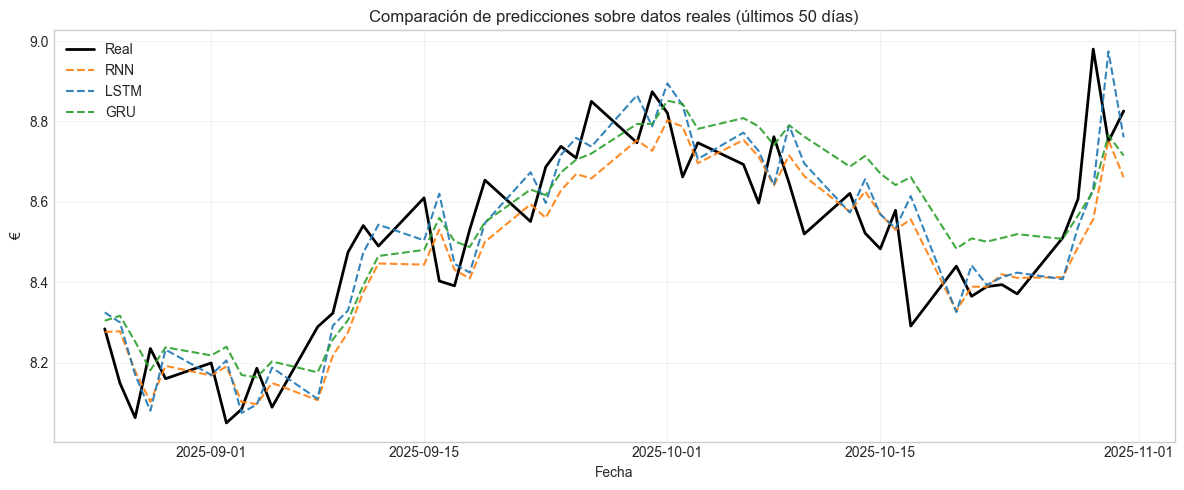

In [105]:
# ==========================================
# 🔁 Predicciones sobre datos reales para comparar RNN vs LSTM vs GRU
# (genera y_pred_rnn, y_pred_lstm, y_pred_gru + y_real_tail, dates_tail)
# ==========================================
import numpy as np
import torch
import matplotlib.pyplot as plt

last_k = 50  # días finales a mostrar en la comparativa

# 1) Preparación de datos escalados y secuencias
df_full = df_actualizado.copy().sort_values("Date").reset_index(drop=True)
df_full["Date"] = pd.to_datetime(df_full["Date"])

cont_cols = [c for c in feature_cols if c not in ["evento_negativo", "Return"]]
df_scaled = df_full.copy()
df_scaled[cont_cols] = scaler_X.transform(df_full[cont_cols])

def create_sequences(mat, lb):
    Xs = []
    for i in range(len(mat) - lb):
        Xs.append(mat[i:i+lb])
    return np.array(Xs)

X_all = df_scaled[feature_cols].astype(float).values
dates_all = df_full["Date"].values
X_seq = create_sequences(X_all, lookback)            # (N-lookback, lookback, n_feat)
dates_seq = dates_all[lookback:]                     # fechas alineadas con target
y_real_aligned = df_full["Close"].values[lookback:]  # reales alineados

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def predict_on_real(seq_tensor, model_obj):
    model_obj.to(device).eval()
    with torch.no_grad():
        y_scaled = model_obj(torch.tensor(seq_tensor, dtype=torch.float32, device=device)).cpu().numpy().reshape(-1,1)
    return scaler_y.inverse_transform(y_scaled).reshape(-1)  # € desescalado

# 2) Calcular predicciones para cada modelo disponible
preds = {}

# LSTM: buscar primero model_lstm; si no, model
if "model" in globals() and model_lstm is not None:
    preds["LSTM"] = predict_on_real(X_seq, model_lstm)
else:
    print("⚠ No encontré ni model_lstm ni model para LSTM.")

if "model_rnn" in globals() and model_rnn is not None:
    preds["RNN"] = predict_on_real(X_seq, model_rnn)
if "model_gru" in globals() and model_gru is not None:
    preds["GRU"] = predict_on_real(X_seq, model_gru)

# 3) Cortar al tramo final last_k
dates_tail  = pd.to_datetime(dates_seq[-last_k:])
y_real_tail = y_real_aligned[-last_k:]

y_pred_lstm = preds.get("LSTM", None)
y_pred_rnn  = preds.get("RNN",  None)
y_pred_gru  = preds.get("GRU",  None)
if y_pred_rnn  is not None: y_pred_rnn  = y_pred_rnn[-last_k:]
if y_pred_lstm is not None: y_pred_lstm = y_pred_lstm[-last_k:]
if y_pred_gru  is not None: y_pred_gru  = y_pred_gru[-last_k:]

# 4) Plot comparativo
plt.figure(figsize=(12,5))
plt.plot(dates_tail, y_real_tail, label="Real", color="black", linewidth=2)

if y_pred_rnn is not None:
    plt.plot(dates_tail, y_pred_rnn,  "--", label="RNN",  alpha=0.9, color="#FF7F0E")
if y_pred_lstm is not None:
    plt.plot(dates_tail, y_pred_lstm, "--", label="LSTM", alpha=0.9, color="#1F77B4")
if y_pred_gru is not None:
    plt.plot(dates_tail, y_pred_gru,  "--", label="GRU",  alpha=0.9, color="#2CA02C")

plt.title(f"Comparación de predicciones sobre datos reales (últimos {last_k} días)")
plt.xlabel("Fecha"); plt.ylabel("€")
plt.legend(frameon=False); plt.grid(alpha=0.25); plt.tight_layout(); plt.show()